# Analysing causes of cancer

### SEN163B - Responsible Data Analytics

Welcome to our code. We are:
- Allegra Melli 6104916, 
- Ann-Kathrin Peitz 6069819, 
- Julian Jahangir 5176379, 
- Jurriaan van Lanschot 4929357, 
- Tim Hol 4487346. 

We hope it contains everything required. If there are any questions please feel free to contact us. Kind regards, group 1.

# 0 - Setting up and importing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pearsonr
import sklearn.model_selection
import sklearn.metrics
import sklearn.datasets
import sklearn.ensemble
import sklearn.preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from IPython.display import Markdown, display
import warnings
import lime
import lime.lime_tabular
import shap
from shap.plots import _waterfall
import xgboost
from xgboost import plot_importance
import json
from collections import OrderedDict
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

cancer_df = pd.read_excel('Project_Data/cancer patient data sets.xlsx')
cancer_df_update = pd.read_excel('Project_Data/cancer patient data sets update.xlsx')

# 1 - Exploring the Cancer data

In [2]:
# Mapping 'Level' from 'low', 'medium', 'high' to 1, 2, 3
level_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
cancer_df['Level'] = cancer_df['Level'].map(level_mapping)

# cancer_df now has the 'Level' variable with values 1, 2, 3

In [3]:
# The imported dataset in a dataframe
cancer_df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [4]:
# Exploring all columns
cancer_df.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

# 2 - Descriptive Analytics

For the descriptive analytics some fundamental lifestyle and demographic characteristics are investigated, which are considered important by literature. Both because these characteristics might serve later as good predictors, but also because these characteristics can be considered as variables that are potentially sensitive to biases. Therefore, it is important to study their prevalence in the dataset, so the potential impacts and later potential relations with other variables can be accounted for.

### 2.1 Age and gender distributions

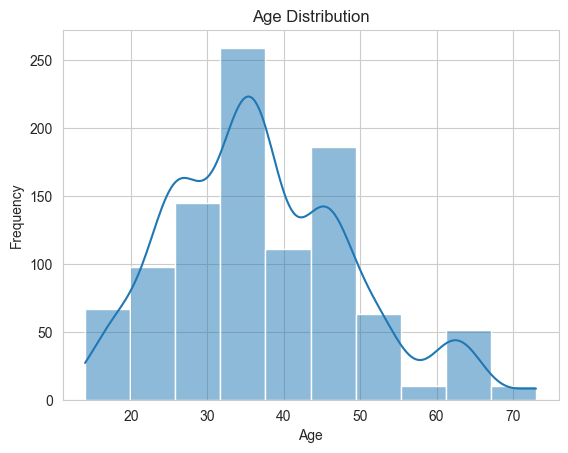

In [5]:
# Observing the age distribution within the dataset
sns.histplot(cancer_df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

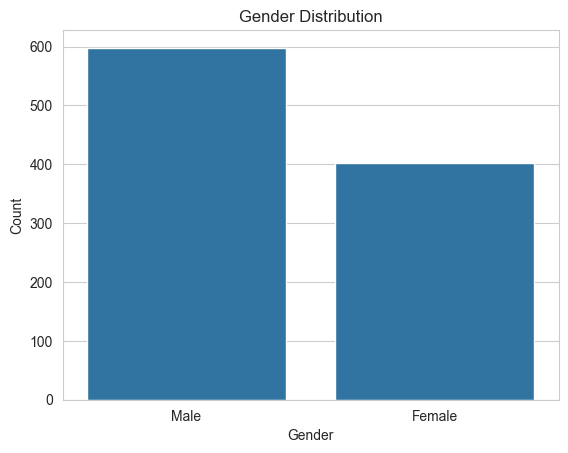

In [6]:
# The Gender distribution of the dataset
sns.countplot(x='Gender', data=cancer_df)
plt.title('Gender Distribution')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

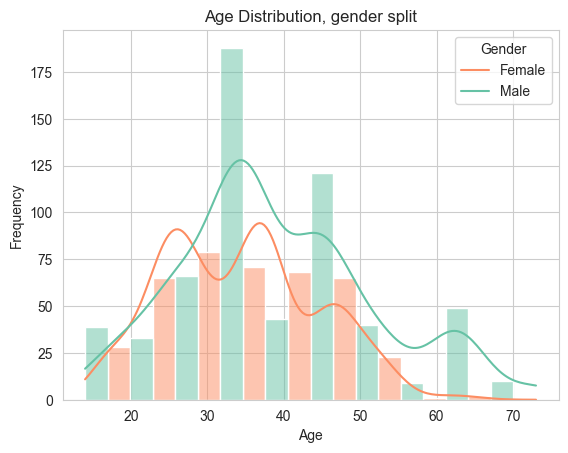

In [7]:
# Observing the age and gender distribution within the dataset
age_gender_plot = sns.histplot(data=cancer_df, x='Age', hue='Gender', multiple='dodge', bins=10, kde=True, palette='Set2')
plt.title('Age Distribution, gender split')
plt.xlabel('Age')
plt.ylabel('Frequency')
age_gender_plot.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

### 2.2 - Disease Severity

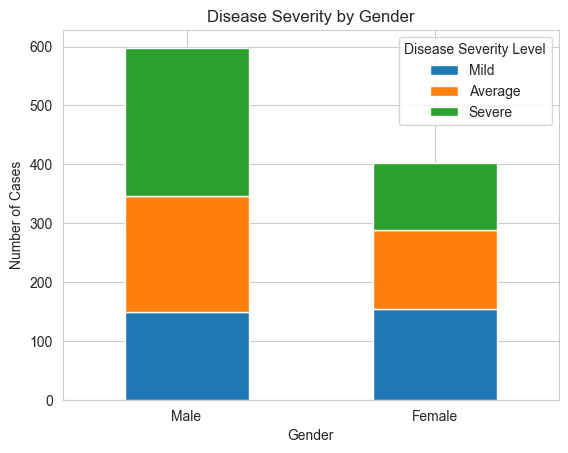

In [8]:
# Amount of cases and their severity vs the gender division
pd.crosstab(cancer_df['Gender'], cancer_df['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])

C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\3649183723.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


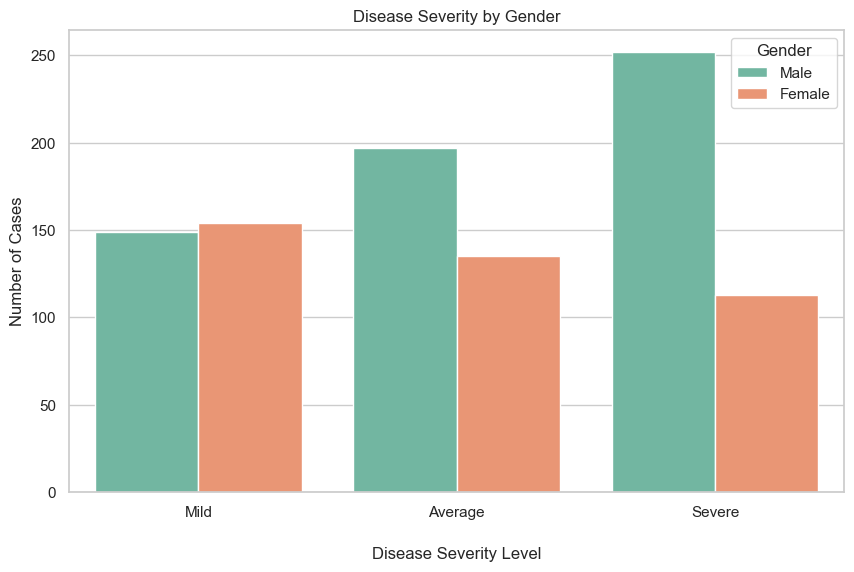

In [9]:
# Level of disease severity by gender, split per level
# Assuming cancer_df is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Making a countplot for the different disease levels per gender
level_gender_plot = sns.countplot(data=cancer_df, x='Level', hue='Gender', palette='Set2')

plt.title('Disease Severity by Gender')
plt.xlabel('Disease Severity Level', labelpad=20)
level_gender_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.ylabel('Number of Cases')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\2723874333.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


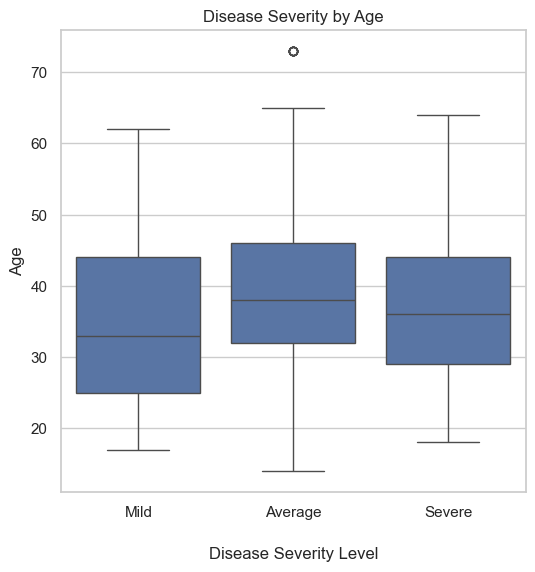

In [10]:
# Disease Severity by age
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Creating a box plot per disease level for the ages
age_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age')
plt.title('Disease Severity by Age')
age_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\915322767.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])


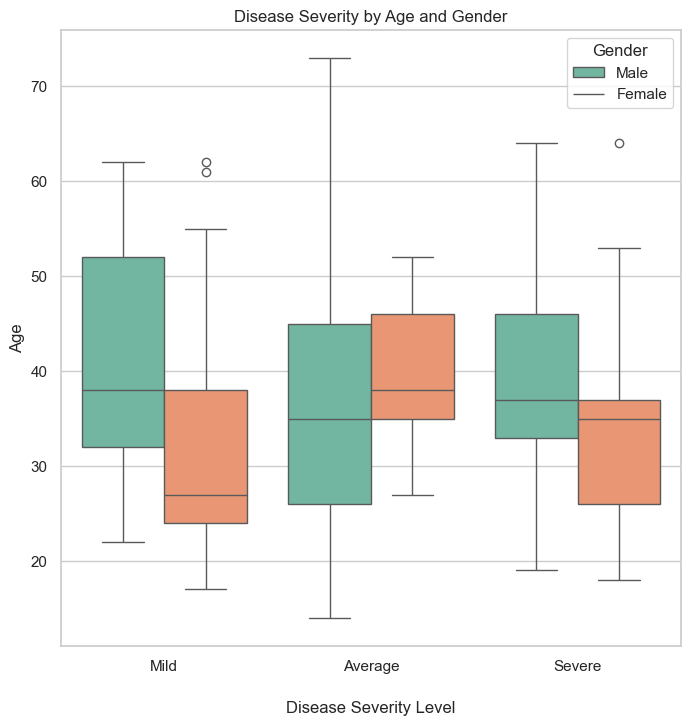

In [11]:
# Disease Severity by gender and age
sns.set(style="whitegrid")
plt.figure(figsize=(8, 8))

# Creating the plot
age_gender_level_plot = sns.boxplot(data=cancer_df, x = 'Level', y = 'Age', hue='Gender', palette='Set2', legend='full')
plt.title('Disease Severity by Age and Gender')
age_gender_level_plot.set_xticklabels(['Mild', 'Average', 'Severe'])
plt.xlabel('Disease Severity Level', labelpad=20)
plt.ylabel('Age')
age_gender_level_plot.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

### 2.3 Smoking distributions

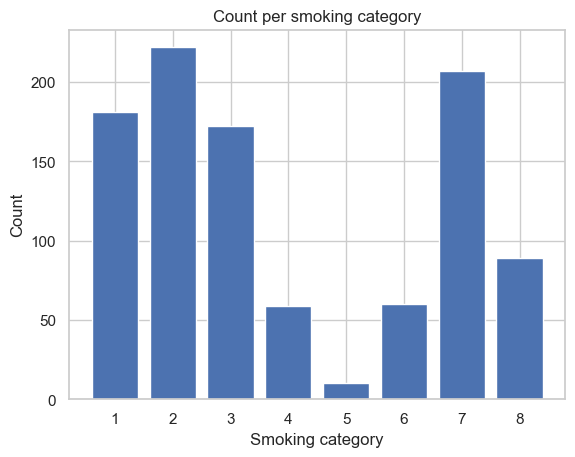

In [12]:
# Count occurrences of each unique value in the 'Smoking' column
smoking_counts = cancer_df['Smoking'].value_counts()

# Plotting
plt.bar(smoking_counts.index, smoking_counts.values)
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per smoking category')
plt.show()

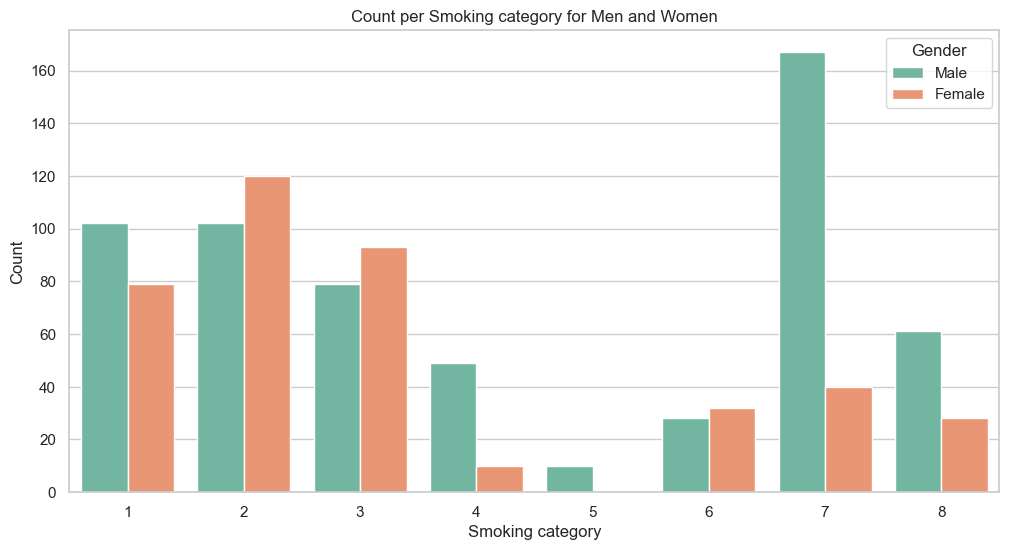

In [13]:
# Smoking category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Creating a count plot for the smoking values per catagory split for Gender
sns.countplot(data=cancer_df, x='Smoking', hue='Gender', palette='Set2')
plt.xlabel('Smoking category')
plt.ylabel('Count')
plt.title('Count per Smoking category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

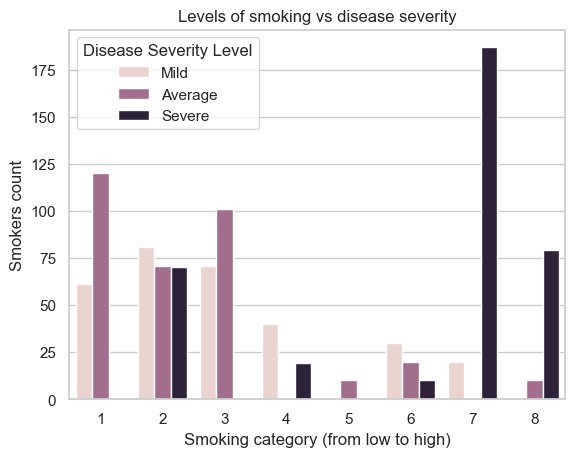

In [14]:
# Smoking level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Smoking', hue = 'Level')
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

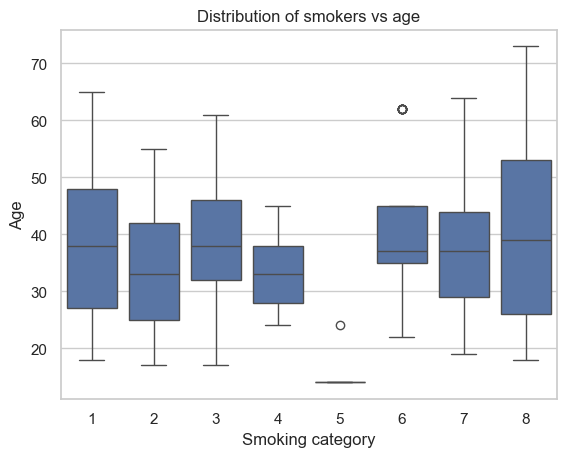

In [15]:
# Smoking level vs age
smoke_age_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age')
plt.title('Distribution of smokers vs age')
plt.xlabel('Smoking category')
plt.show()

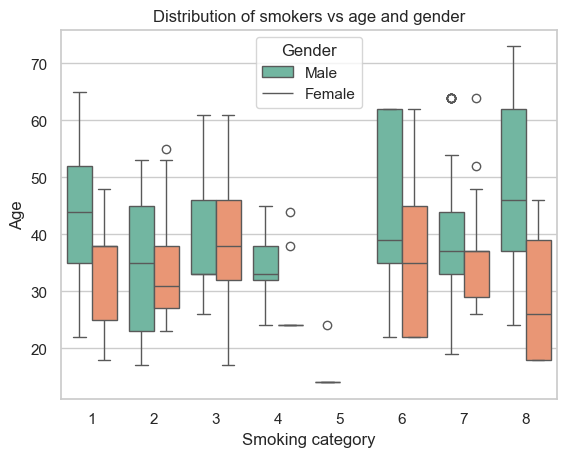

In [16]:
# Smoking level vs age and gender
smoke_age_gender_plot = sns.boxplot(data=cancer_df, x='Smoking', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of smokers vs age and gender')
plt.xlabel('Smoking category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\789224420.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Male' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cancer_df_gender.loc[cancer_df_gender['Gender'] == 1, 'Gender'] = 'Male'


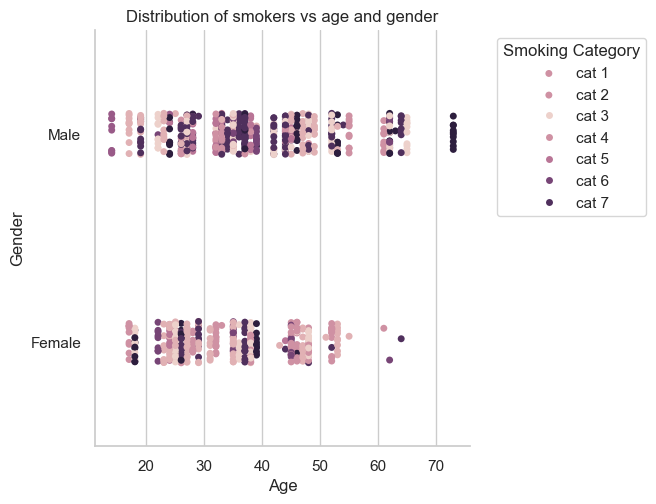

In [17]:
# Visualizing the same data in a catplot
# The dataframe needs to be copied before recoding
cancer_df_gender = cancer_df.copy()

# Replace numeric values with string labels in the copied dataset
cancer_df_gender.loc[cancer_df_gender['Gender'] == 1, 'Gender'] = 'Male'
cancer_df_gender.loc[cancer_df_gender['Gender'] == 2, 'Gender'] = 'Female'
catplot_smokes_age_gender = sns.catplot(data=cancer_df_gender, x = 'Age', y = 'Gender', hue='Smoking')
catplot_smokes_age_gender._legend.remove()
plt.title('Distribution of smokers vs age and gender')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.legend(title='Smoking Category', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 2.4 Air pollution

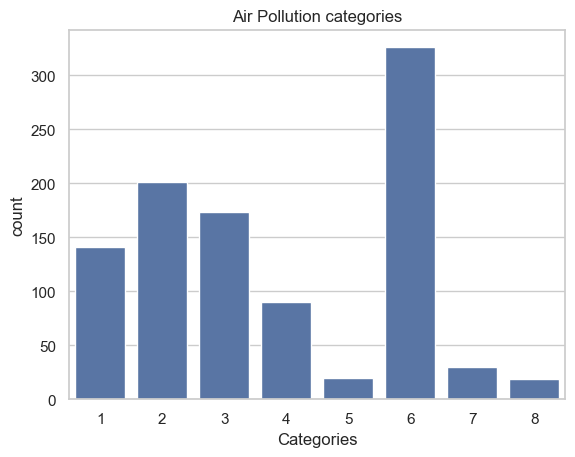

In [18]:
# Making a Air pollution histogram
sns.countplot(data=cancer_df, x='Air Pollution')
plt.title('Air Pollution categories')
plt.xlabel('Categories')
plt.show()

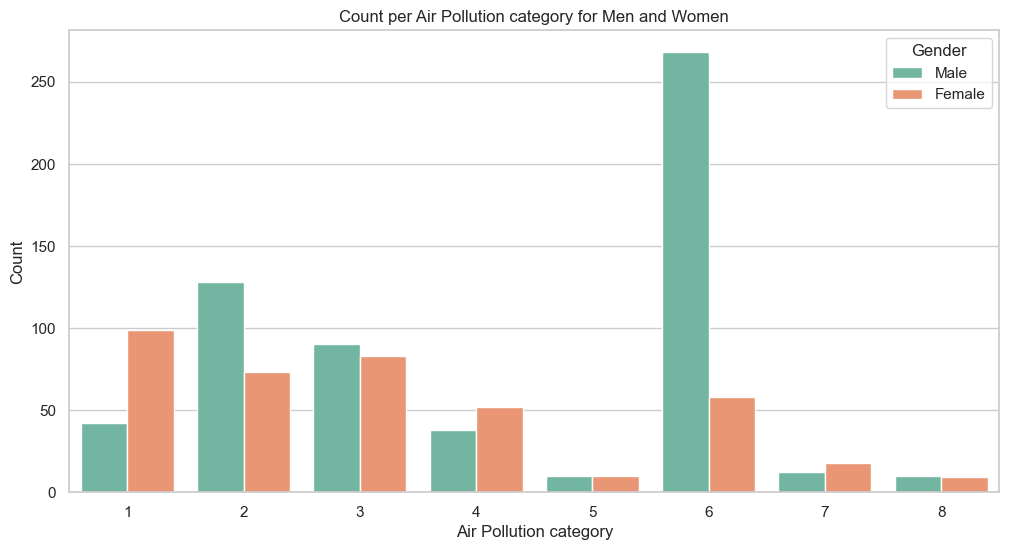

In [19]:
# Air pollution category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Air Pollution', hue='Gender', palette='Set2')
plt.xlabel('Air Pollution category')
plt.ylabel('Count')
plt.title('Count per Air Pollution category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

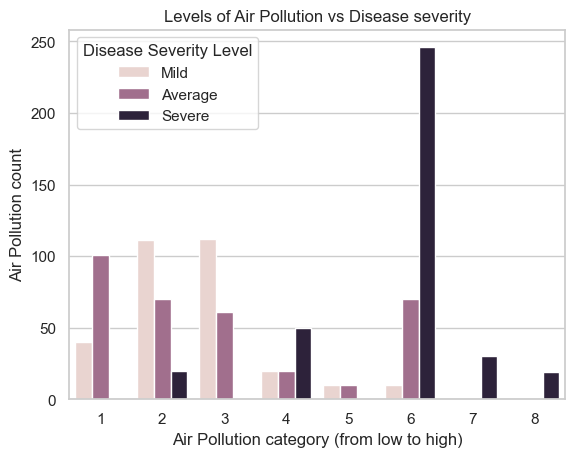

In [20]:
# air pollution level vs Disease Severity
sns.countplot(data=cancer_df, x = 'Air Pollution', hue = 'Level')
plt.title('Levels of Air Pollution vs Disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe'])
plt.xlabel('Air Pollution category (from low to high)')
plt.ylabel('Air Pollution count')
plt.show()

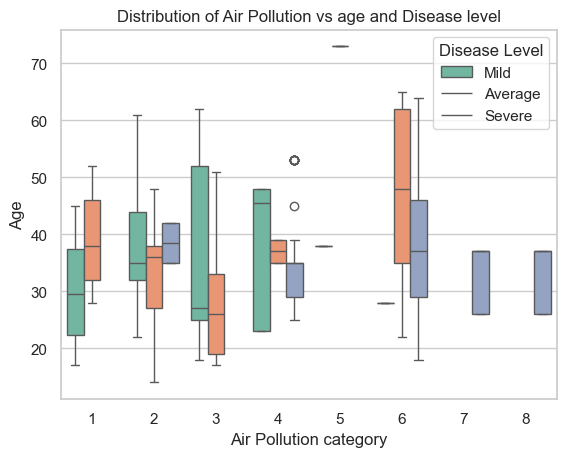

In [21]:
# Air pollution level vs age
air_age_plot = sns.boxplot(data=cancer_df, x='Air Pollution', y='Age', hue='Level', palette='Set2')
plt.title('Distribution of Air Pollution vs age and Disease level')
plt.xlabel('Air Pollution category')
plt.legend(title='Disease Level', labels=['Mild', 'Average', 'Severe'])
plt.show()

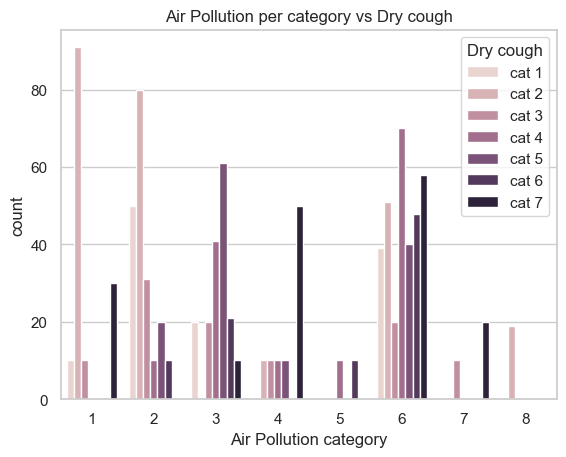

In [22]:
# Air pollution level vs dry cough
air_cough_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='Dry Cough')
plt.title('Air Pollution per category vs Dry cough')
plt.xlabel('Air Pollution category')
plt.legend(title='Dry cough', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

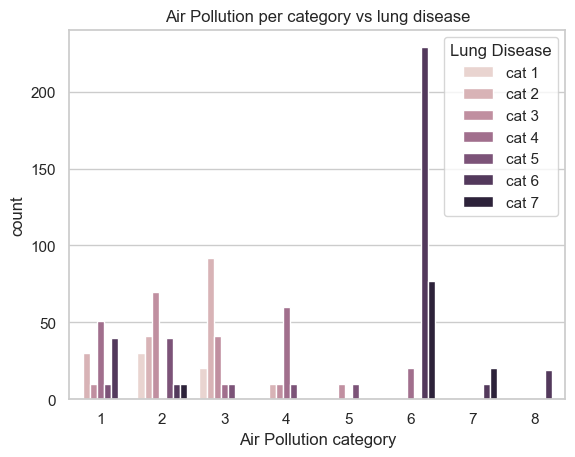

In [23]:
# Air pollution level vs dry cough
air_lung_plot = sns.countplot(data=cancer_df, x='Air Pollution', hue='chronic Lung Disease')
plt.title('Air Pollution per category vs lung disease')
plt.xlabel('Air Pollution category')
plt.legend(title='Lung Disease', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.5 Obesity

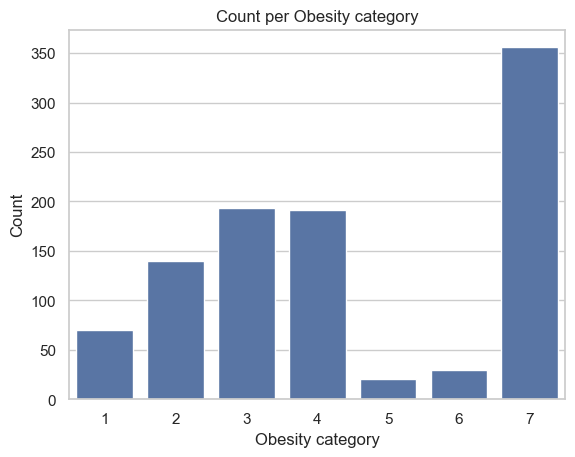

In [24]:
# Count occurrences of each unique value in the 'Smoking' column
obesity_counts = sns.countplot(data=cancer_df, x='Obesity')

# Plotting
plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category')
plt.show()

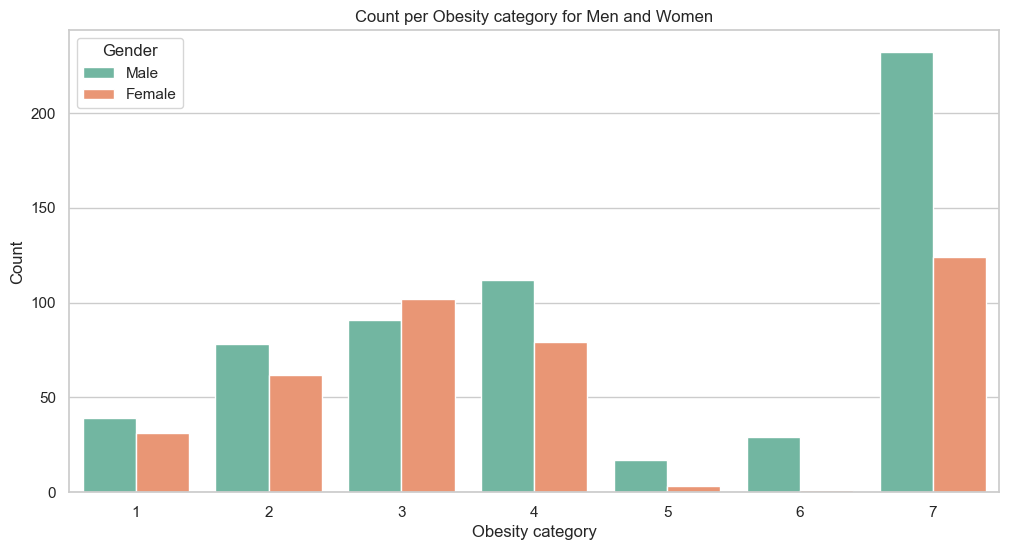

In [25]:
# Obesity category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Assuming 'Gender' is the column name for gender
sns.countplot(data=cancer_df, x='Obesity', hue='Gender', palette='Set2')
plt.xlabel('Obesity category')
plt.ylabel('Count')
plt.title('Count per Obesity category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

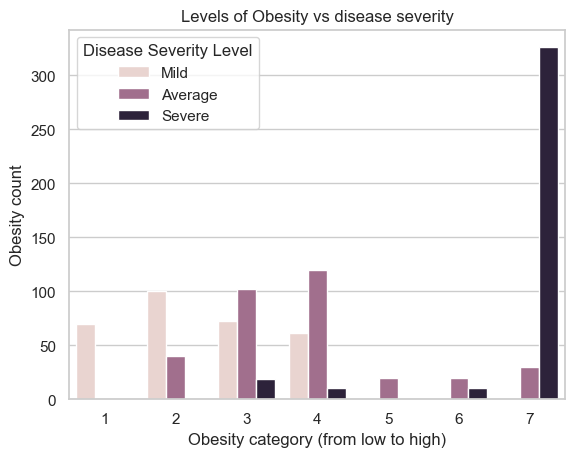

In [26]:
# Obesity level vs Disease Severity
sns.countplot(data=cancer_df, x='Obesity', hue='Level')
plt.title('Levels of Obesity vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Obesity category (from low to high)')
plt.ylabel('Obesity count')
plt.show()

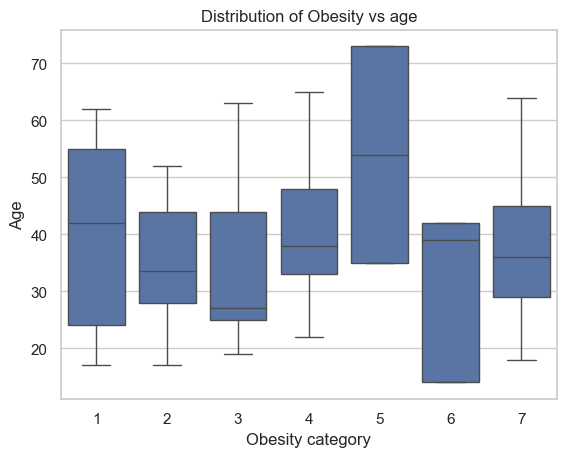

In [27]:
# Obesity level vs age
obesity_age_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age')
plt.title('Distribution of Obesity vs age')
plt.xlabel('Obesity category')
plt.show()

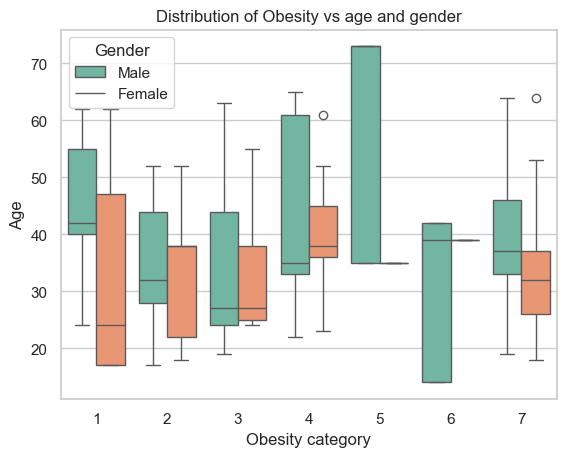

In [28]:
# Obesity level vs age and gender
obesity_age_gender_plot = sns.boxplot(data=cancer_df, x='Obesity', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Obesity vs age and gender')
plt.xlabel('Obesity category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

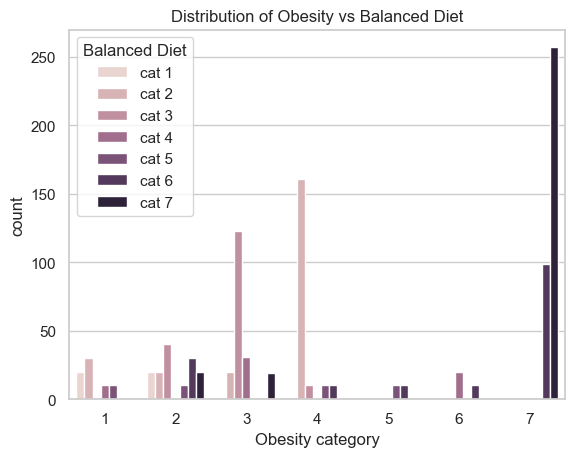

In [29]:
# Obesity level vs balanced diet
obesity_age_diet_plot = sns.countplot(data=cancer_df, x='Obesity', hue='Balanced Diet')
plt.title('Distribution of Obesity vs Balanced Diet')
plt.xlabel('Obesity category')
plt.legend(title='Balanced Diet', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

### 2.6 Genetic Risk

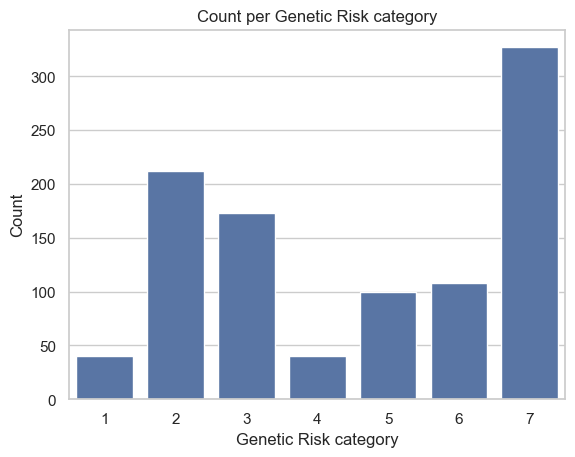

In [30]:
# Count occurrences of each unique value in the Genetic Risk column
genetic_risk_counts = sns.countplot(data=cancer_df, x='Genetic Risk')

# Plotting
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category')
plt.show()

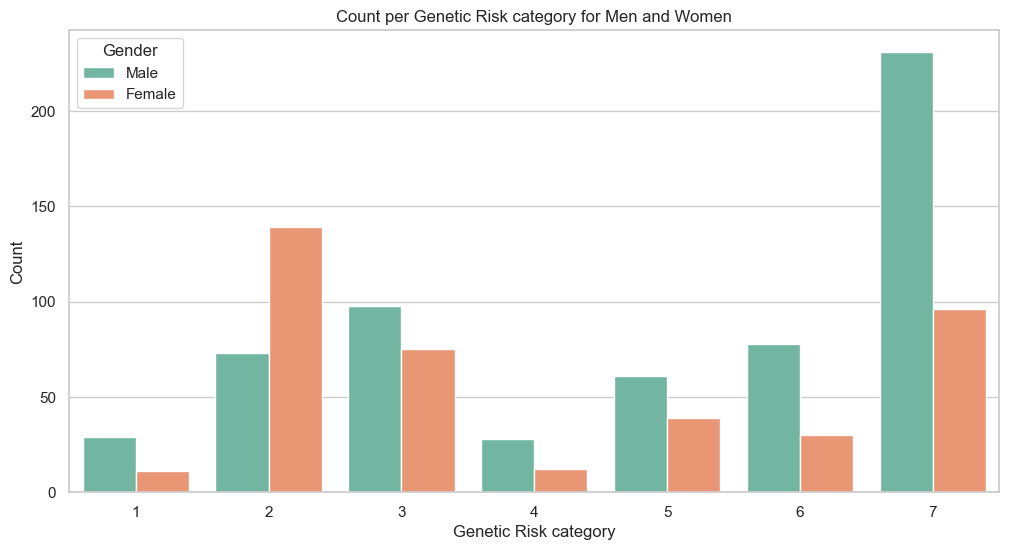

In [31]:
# Genetic Risk category per gender
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Countplot Genetic Risk and Gender
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Gender', palette='Set2')
plt.xlabel('Genetic Risk category')
plt.ylabel('Count')
plt.title('Count per Genetic Risk category for Men and Women')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks()
plt.show()

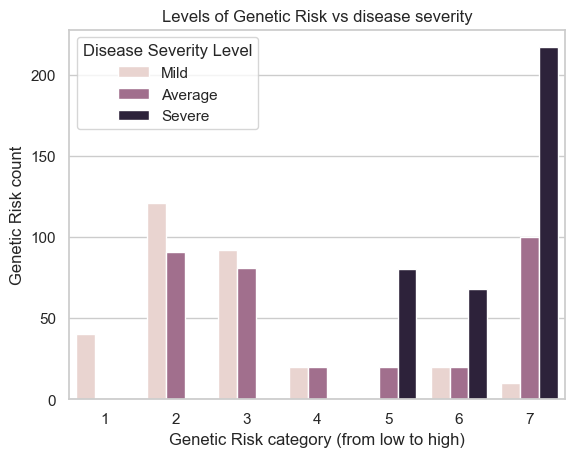

In [32]:
# Genetic Risk level vs Disease Severity
sns.countplot(data=cancer_df, x='Genetic Risk', hue='Level')
plt.title('Levels of Genetic Risk vs disease severity')
plt.legend(title='Disease Severity Level', labels=['Mild', 'Average', 'Severe', ])
plt.xlabel('Genetic Risk category (from low to high)')
plt.ylabel('Genetic Risk count')
plt.show()

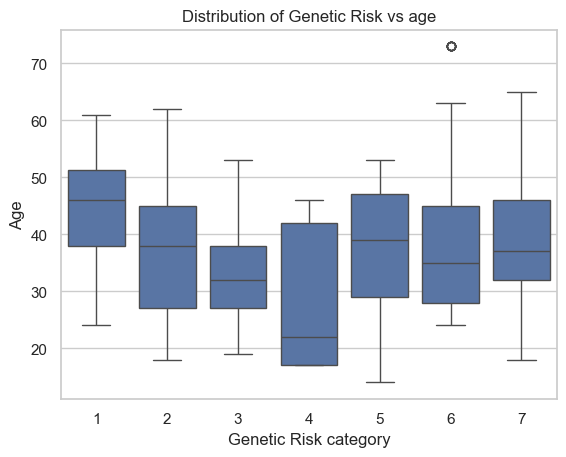

In [33]:
# Genetic Risk level vs age
genetic_risk_age_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age')
plt.title('Distribution of Genetic Risk vs age')
plt.xlabel('Genetic Risk category')
plt.show()

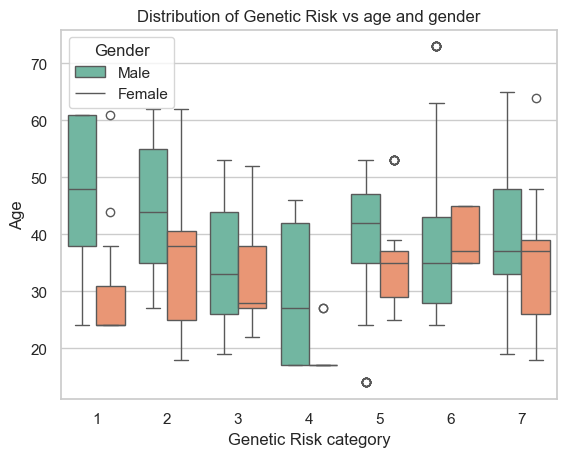

In [34]:
# Genetic Risk level vs age and gender
genetic_risk_age_gender_plot = sns.boxplot(data=cancer_df, x='Genetic Risk', y='Age', hue='Gender', palette='Set2')
plt.title('Distribution of Genetic Risk vs age and gender')
plt.xlabel('Genetic Risk category')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

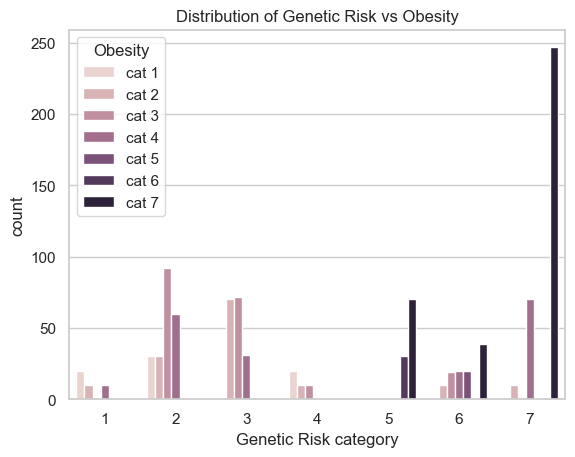

In [35]:
# Genetic Risk level vs balanced diet
genetic_risk_age_diet_plot = sns.countplot(data=cancer_df, x='Genetic Risk', hue='Obesity')
plt.title('Distribution of Genetic Risk vs Obesity')
plt.xlabel('Genetic Risk category')
plt.legend(title='Obesity', labels=['cat 1', 'cat 2', 'cat 3', 'cat 4', 'cat 5', 'cat 6', 'cat 7'])
plt.show()

# Diagnostic Analysis
Diagnostic Analytics After having performed the description of the dataset, you will be running a diagnostic analysis on the dataset. The goal of diagnostic analytics is to determine the causes of trends and correlations between variables. Required activities
Analyze missing data and determine relevant causes.
Perform correlation analysis among variables and between variables and the target variable for prediction (and corresponding statistical testing).
Perform statistical testing between subgroups of features.
Analyse the dataset and identify potential risks and bias.
Reflect on the analysis you carried and identity possible negative implications.
Propose, explore, and implement bias mitigation (reflect on the limitations)

In [36]:
print(cancer_df.isnull().values.any())

False


In [37]:
print(cancer_df.isnull().sum())

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


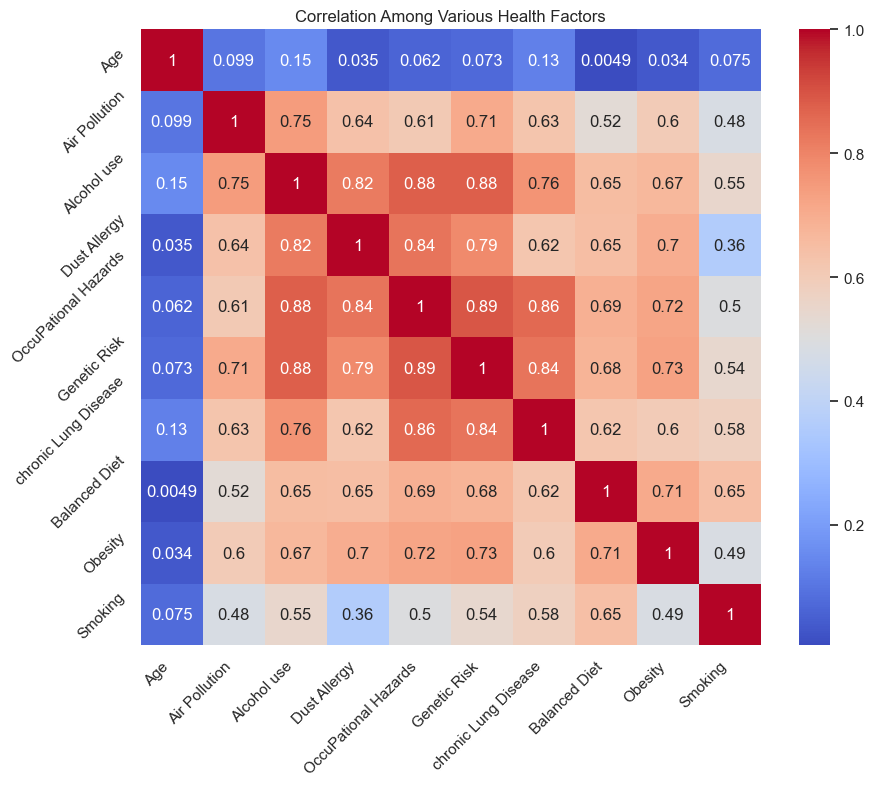

In [38]:

plt.figure(figsize=(10, 8))
corr = cancer_df[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


In [39]:
print(cancer_df['Level'])

0      1
1      2
2      3
3      3
4      3
      ..
995    3
996    3
997    3
998    3
999    3
Name: Level, Length: 1000, dtype: int64


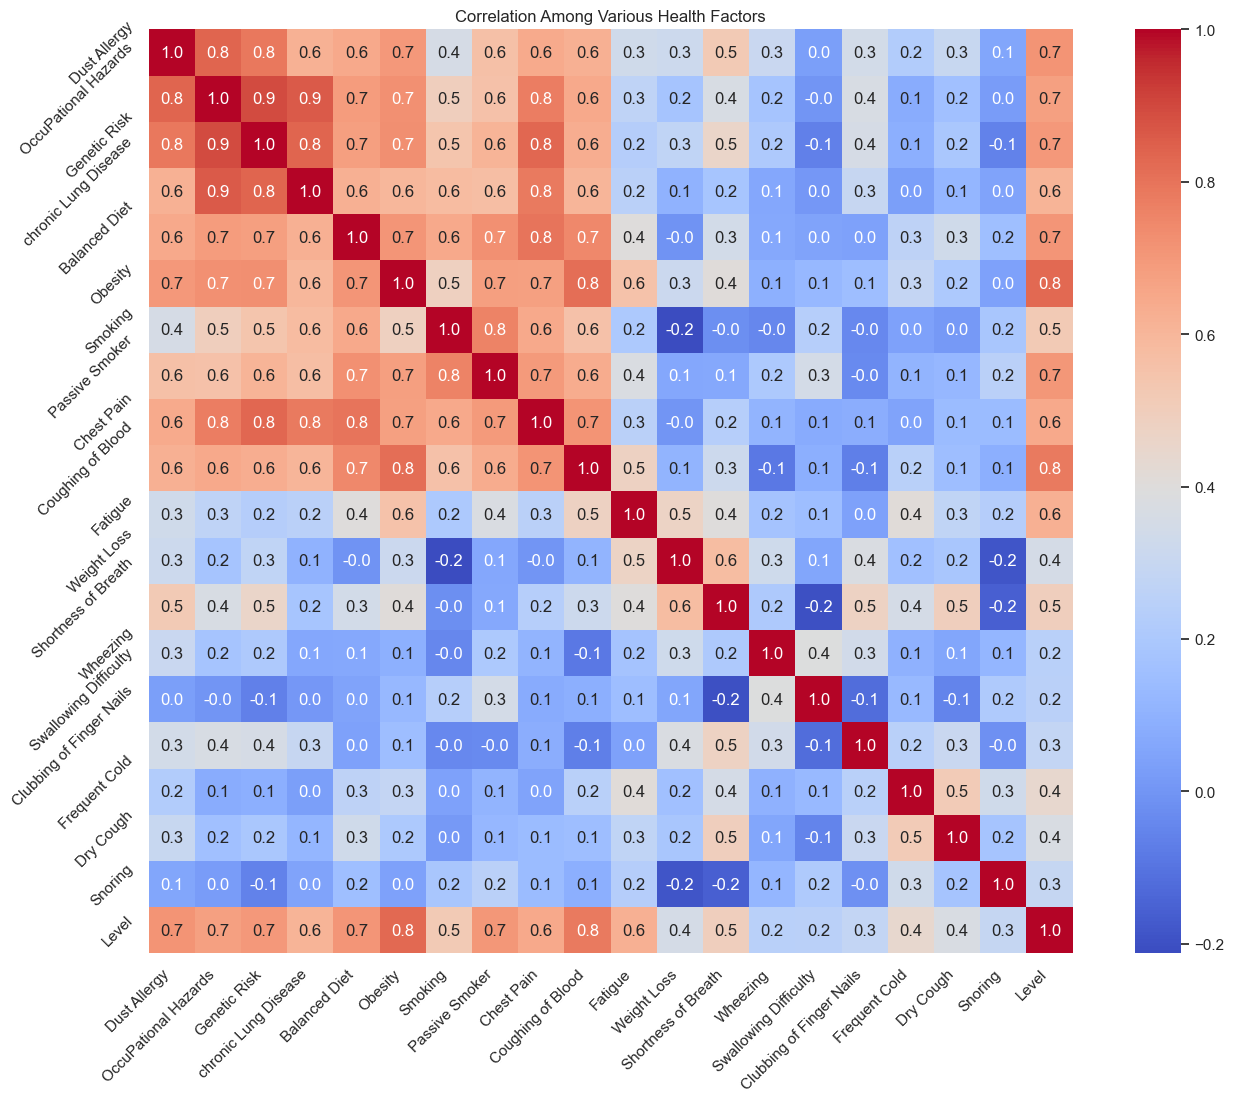

In [40]:
plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = cancer_df[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring', "Level"]].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()

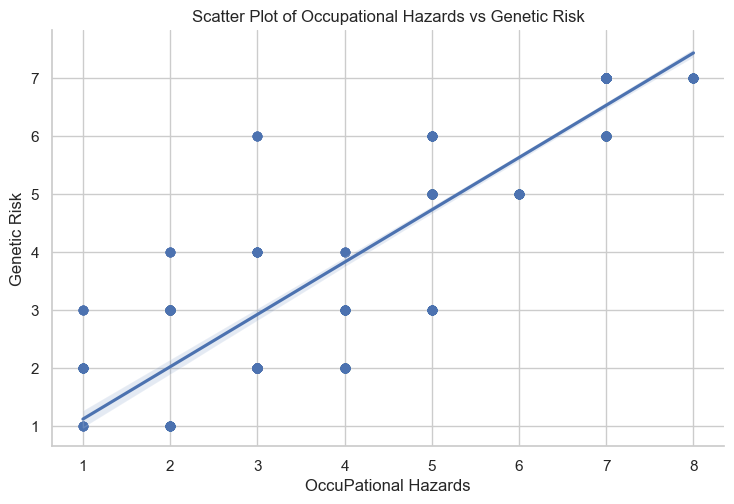

In [41]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

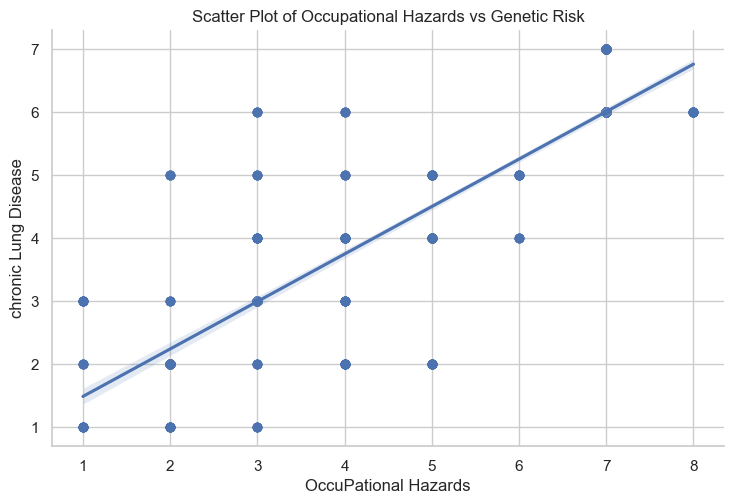

In [42]:
sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

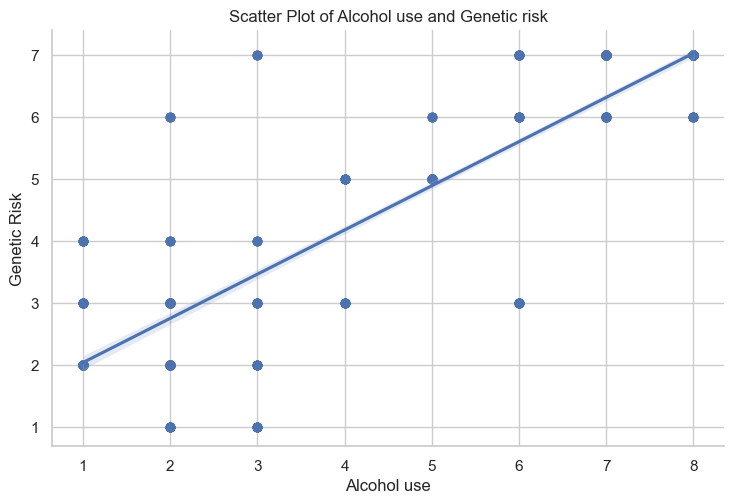

In [43]:
sns.lmplot(x='Alcohol use', y='Genetic Risk', data=cancer_df, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Alcohol use and Genetic risk')
plt.show()

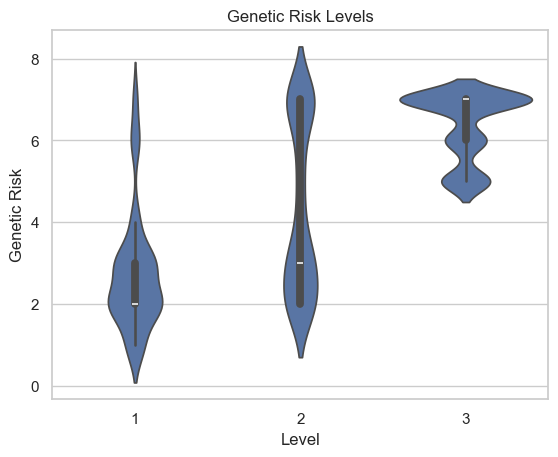

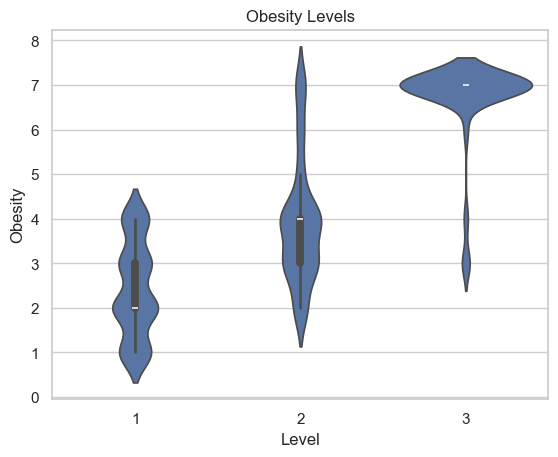

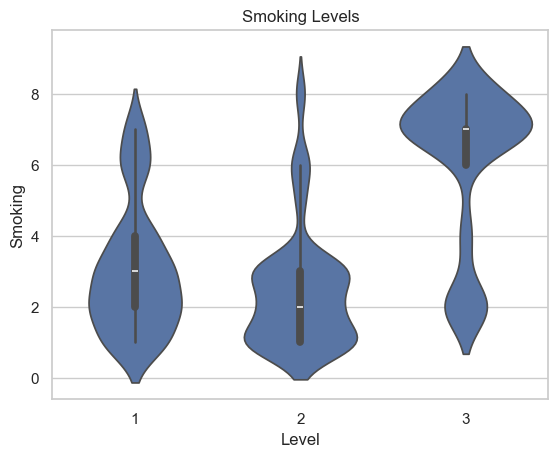

In [44]:
# Violin plot for 'Genetic Risk' by 'Level'
sns.violinplot(x='Level', y='Genetic Risk', data=cancer_df_update)
plt.title('Genetic Risk Levels')
plt.show()

# Violin plot for 'Obesity' by 'Level'
sns.violinplot(x='Level', y='Obesity', data=cancer_df_update)
plt.title('Obesity Levels')
plt.show()

# Violin plot for 'Smoking' by 'Level'
sns.violinplot(x='Level', y='Smoking', data=cancer_df_update)
plt.title('Smoking Levels')
plt.show()

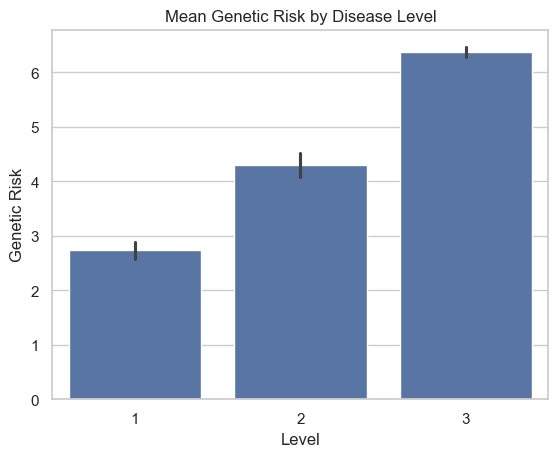

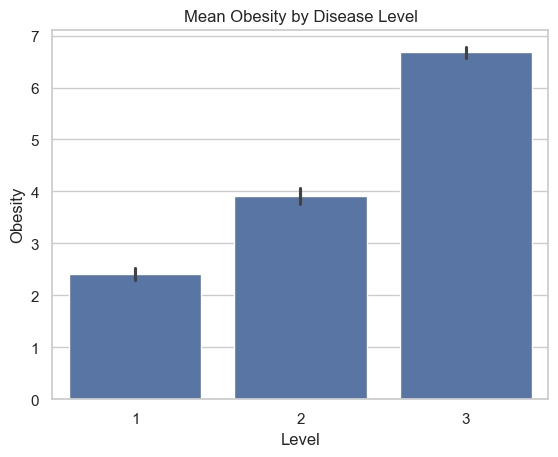

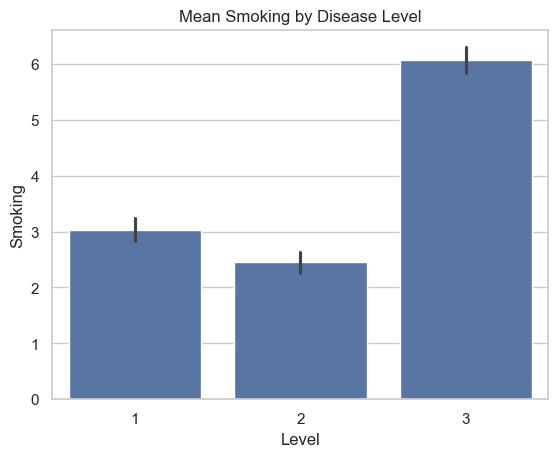

In [45]:
# Bar plot for the mean 'Genetic Risk' by 'Level'
sns.barplot(x='Level', y='Genetic Risk', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Genetic Risk by Disease Level')
plt.show()

# Bar plot for the mean 'Obesity' by 'Level'
sns.barplot(x='Level', y='Obesity', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Obesity by Disease Level')
plt.show()

# Bar plot for the mean 'Smoking' by 'Level'
sns.barplot(x='Level', y='Smoking', data=cancer_df_update, estimator=np.mean)
plt.title('Mean Smoking by Disease Level')
plt.show()


In [46]:
# ANOVA for 'Genetic Risk' across the different levels
f_value, p_value = stats.f_oneway(cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 1],
                                   cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 2],
                                   cancer_df_update['Genetic Risk'][cancer_df_update['Level'] == 3])
print('ANOVA for Genetic Risk by Level:', f_value, p_value)

ANOVA for Genetic Risk by Level: 488.9807799309334 1.0316939029643608e-148


In [47]:
# Kruskal-Wallis H-test for 'Genetic Risk' across different 'Levels'
stat, p = stats.kruskal(cancer_df_update[cancer_df_update['Level'] == 1]['Genetic Risk'],
                        cancer_df_update[cancer_df_update['Level'] == 2]['Genetic Risk'],
                        cancer_df_update[cancer_df_update['Level'] == 3]['Genetic Risk'])
print('Kruskal-Wallis H-test for Genetic Risk across Levels: Statistic:', stat, 'P-value:', p)

Kruskal-Wallis H-test for Genetic Risk across Levels: Statistic: 456.46102739795 P-value: 7.598839972383026e-100


In [48]:
# Pearson correlation for 'Genetic Risk' and 'Occupational Hazards'
corr_coefficient, p_value = stats.pearsonr(cancer_df_update['Genetic Risk'], cancer_df_update['OccuPational Hazards'])
print('Correlation between Genetic Risk and Occupational Hazards:', corr_coefficient, p_value)

# Pearson correlation for 'Alcohol Use' and 'Genetic Risk'
corr_coefficient, p_value = stats.pearsonr(cancer_df_update['Alcohol use'], cancer_df_update['Genetic Risk'])
print('Correlation between Alcohol Use and Genetic Risk:', corr_coefficient, p_value)

Correlation between Genetic Risk and Occupational Hazards: 0.8930485226784648 0.0
Correlation between Alcohol Use and Genetic Risk: 0.8772098877053734 2.7193e-320


In [49]:
# Spearman's rank correlation for 'Alcohol Use' and 'Genetic Risk'
spearman_coeff, p_val = stats.spearmanr(cancer_df_update['Alcohol use'], cancer_df_update['Genetic Risk'])
print("Spearman's Rank Correlation Coefficient between Alcohol use and Genetic Risk:", spearman_coeff, 'P-value:', p_val)

Spearman's Rank Correlation Coefficient between Alcohol use and Genetic Risk: 0.8482912142734498 P-value: 8.247769974262811e-278


In [50]:
# Create a DataFrame to hold the results
test_results = pd.DataFrame({
    'Test': ['ANOVA', 'Kruskal-Wallis', 'Pearson Correlation (Genetic Risk & Occupational Hazards)',
             'Pearson Correlation (Alcohol Use & Genetic Risk)', "Spearman's Rank Correlation (Alcohol use & Genetic Risk)"],
    'Statistic': [488.98, 456.46, 0.893, 0.877, 0.848],
    'P-Value': [1.03169e-148, 7.59884e-100, 0.0, 2.7193e-320, 8.24777e-278],
    'Comments': ['Significant difference across Levels',
                 'Significant distribution difference across Levels',
                 'Strong positive relationship',
                 'Strong positive relationship',
                 'Strong positive association']
})

# Display the DataFrame
print(test_results)

# Output to LaTeX format - useful for LaTeX documents
latex_output = test_results.to_latex(index=False)
print(latex_output)

# Save to Excel format - useful for Word or other document editors
test_results.to_excel('statistical_test_results.xlsx', index=False)

# Save to CSV format - alternative for importing into various programs
test_results.to_csv('statistical_test_results.csv', index=False)

                                                Test  Statistic  \
0                                              ANOVA    488.980   
1                                     Kruskal-Wallis    456.460   
2  Pearson Correlation (Genetic Risk & Occupation...      0.893   
3   Pearson Correlation (Alcohol Use & Genetic Risk)      0.877   
4  Spearman's Rank Correlation (Alcohol use & Gen...      0.848   

         P-Value                                           Comments  
0  1.031690e-148               Significant difference across Levels  
1  7.598840e-100  Significant distribution difference across Levels  
2   0.000000e+00                       Strong positive relationship  
3  2.719337e-320                       Strong positive relationship  
4  8.247770e-278                        Strong positive association  
\begin{tabular}{lrrl}
\toprule
Test & Statistic & P-Value & Comments \\
\midrule
ANOVA & 488.980000 & 0.000000 & Significant difference across Levels \\
Kruskal-Wallis & 456.460

# Predictive Analytics
Once the problem you want to tackle has been assessed and refined, you can proceed with the predictive analytics part. As a reminder, the main goal of predictive analytics is to build a predictive model in order to be able to make predictions on unseen data, based on the informative content of the existing data.
Required activities
- Identify the target variable y for the predictive problem at hand
- Analyze the distribution of the target variable y: Is it balanced or unbalanced?
- Split the available data into a training-testing-validation set.
o The training set will be used to train the predictive model.
o The testing set will be used to assess the model performance.
o The validation set is a subset of data which will be set aside (unseen from the
model) and used to simulate the future data that the model will need to predict.
- According to the defined problem (regression/binary classification/multiclass classification)
o Select at least two different appropriate performance metrics
o Assess one baseline model and at least three different supervised predictive
models using the aforementioned performance metric
- (Optionally) Employ unsupervised techniques to further extract insights from the data
- Critically discuss the modeling choices and the outcomes of the previous steps.
Note: Please note that developing a prototype is, by definition, an iterative process, so don’t be afraid to
go back to problem definition and adjust it as you gain a better understanding of the problem at hand.

In [51]:
# Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Assuming 'Level' is the target variable
target_counts = data['Level'].value_counts()

# Check if the target variable is balanced or unbalanced
if len(target_counts) == 2:
    # If there are exactly two classes, we consider it balanced if the ratio between the classes is within a certain threshold
    class_ratio = target_counts.iloc[0] / target_counts.iloc[1]
    threshold = 0.5  # You can adjust this threshold based on your requirements
    if 1 - threshold <= class_ratio <= 1 + threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")
else:
    # If there are more than two classes, we consider it balanced if each class has approximately the same number of samples
    min_samples = target_counts.min()
    max_samples = target_counts.max()
    threshold = 0.8
    if min_samples / max_samples >= threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")

names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest"]

classifiers = [
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

# Step 1: Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training, validation and testing sets

# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.7, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Now we have X_train_temp, X_val, X_test for features and y_train_temp, y_val, y_test for targets
# X_train_temp is the training data, X_val is the validation data, and X_test is the test data

# Now you have X_train, X_valid for features and y_train, y_valid for targets
# X_train is your finalized training data, and X_valid is your validation data

# You can print the sizes of the datasets to confirm the splits
print("Training data size:", X_train.shape)
print("Validation data size:", X_valid.shape)
print("Test data size:", X_test.shape)

# Step 5: Model selection and training
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy for Naive Bayesian Model: ", accuracy_score(y_test, y_pred))
print("F1 for Naive Bayesian Model: ", f1_score(y_test, y_pred, average=None))

# Creating empty DFs
accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
balanced_accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
f1_score_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)

# Concatenating the DataFrames
accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df] * len(names), ignore_index=True)
balanced_accuracy_per_dataset_df = pd.concat([balanced_accuracy_per_dataset_df] * len(names), ignore_index=True)
f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df] * len(names), ignore_index=True)

# For each dataset split, train the classifiers and evaluate
for technique in ["Ordinal Encoding"]:
    print("[INFO] - Categorical technique: ", technique)
    accuracy_line = {"Dataset Name": technique}
    balanced_accuracy_line = {"Dataset Name": technique}
    f1_score_line = {"Dataset Name": technique}

    for classifier, method_name in zip(classifiers, names):
        print("[INFO] - Classifier: ", method_name)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy_line[method_name] = accuracy_score(y_test, y_pred)
        balanced_accuracy_line[method_name] = balanced_accuracy_score(y_test, y_pred)
        f1_score_line[method_name] = f1_score(y_test, y_pred, average=None)

    # Append the lines to the DataFrames
    accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df, pd.DataFrame([accuracy_line])], ignore_index=True)
    balanced_accuracy_per_dataset_df = pd.concat(
        [balanced_accuracy_per_dataset_df, pd.DataFrame([balanced_accuracy_line])], ignore_index=True)
    f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df, pd.DataFrame([f1_score_line])], ignore_index=True)

# Step 6: Model evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example new data (replace this with your own new data)
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Air Pollution': [3],
    'Alcohol use': [2],
    'Dust Allergy': [4],
    'OccuPational Hazards': [5],
    'Genetic Risk': [6],
    'chronic Lung Disease': [3],
    'Balanced Diet': [7],
    'Obesity': [4],
    'Smoking': [6],
    'Passive Smoker': [2],
    'Chest Pain': [1],
    'Coughing of Blood': [1],
    'Fatigue': [2],
    'Weight Loss': [1],
    'Shortness of Breath': [3],
    'Wheezing': [2],
    'Swallowing Difficulty': [1],
    'Clubbing of Finger Nails': [1],
    'Frequent Cold': [2],
    'Dry Cough': [1],
    'Snoring': [3]
})

The target variable 'Level' is balanced.
Training data size: (300, 23)
Validation data size: (350, 23)
Test data size: (350, 23)
Accuracy for Naive Bayesian Model:  0.8771428571428571
F1 for Naive Bayesian Model:  [0.85840708 0.92537313 0.85714286]
[INFO] - Categorical technique:  Ordinal Encoding
[INFO] - Classifier:  Logistic Regression
[INFO] - Classifier:  Decision Tree
[INFO] - Classifier:  Random Forest
Accuracy: 1.0


C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\572286336.py:101: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  accuracy_per_dataset_df = pd.concat([accuracy_per_da

Predicted cancer levels for new data: ['Low']


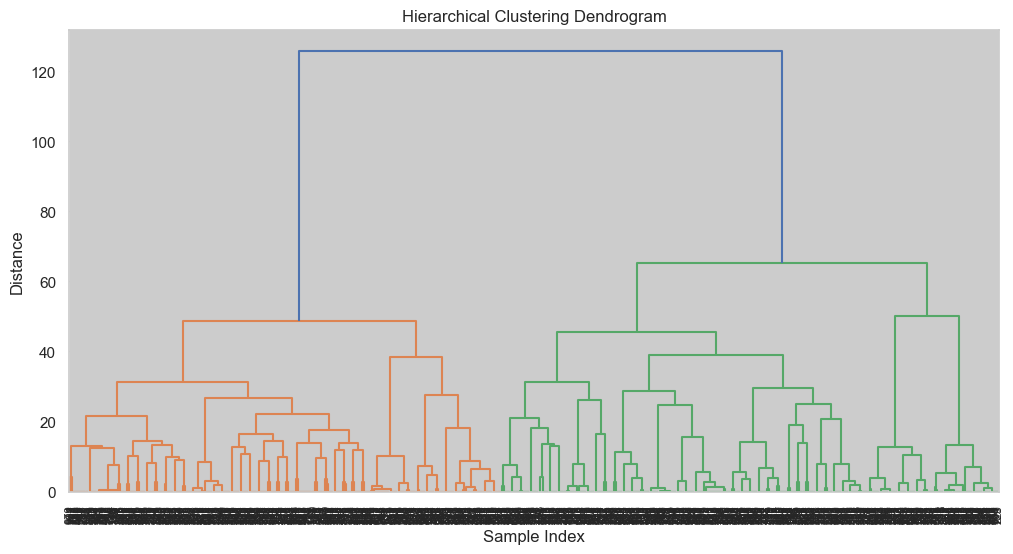

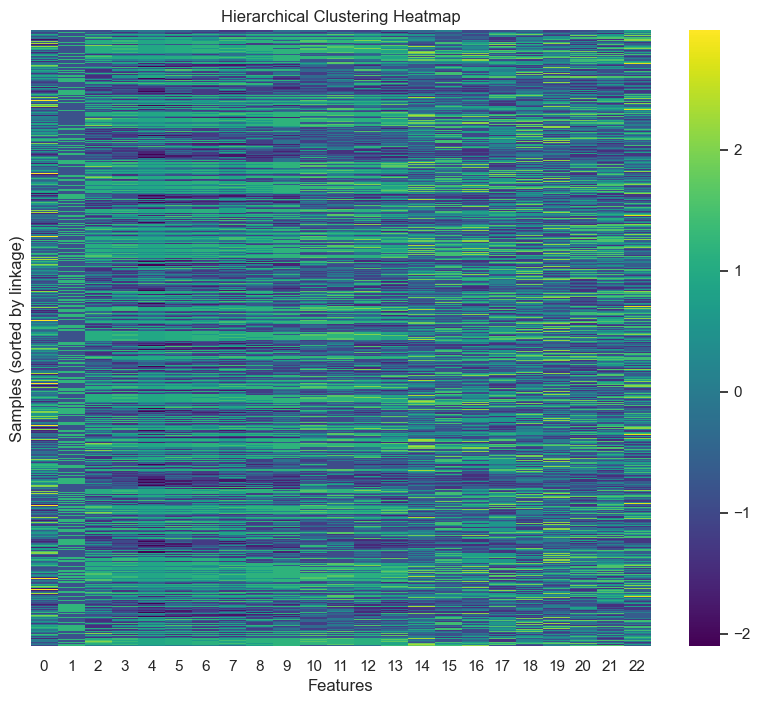

In [52]:
# Make predictions
predictions = model.predict(new_data)

# Print predictions
print("Predicted cancer levels for new data:", predictions)

# Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Assuming 'Level' is not used for clustering
X = data.drop(['Patient Id', 'Level'], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = hierarchy.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=8,  # font size for the x axis labels
)
plt.show()

# You can also use a heatmap to visualize the clusters
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled[np.argsort(Z[:, 2])], cmap='viridis', yticklabels=False)
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Features')
plt.ylabel('Samples (sorted by linkage)')
plt.show()


### Step 2: Data preprocessing

C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to

Logistic Regression: Mean Accuracy: 0.9833, Standard Deviation: 0.0105
Decision Tree: Mean Accuracy: 1.0000, Standard Deviation: 0.0000
Random Forest: Mean Accuracy: 0.9933, Standard Deviation: 0.0133
Naive Bayes: Mean Accuracy: 0.9100, Standard Deviation: 0.0226
Ensemble Predictor Accuracy on Validation Data: 1.0000


C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


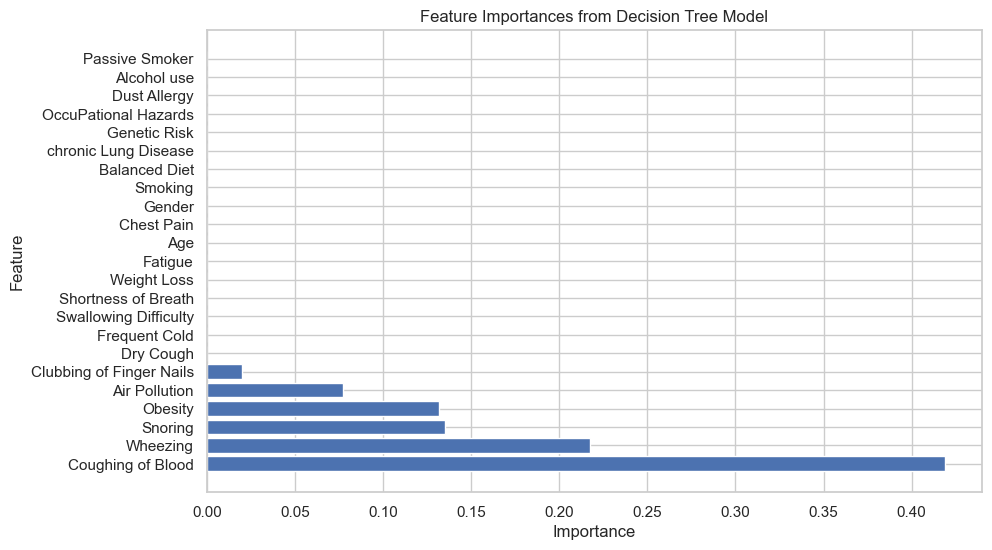

                     Feature  Importance
13         Coughing of Blood    0.419018
17                  Wheezing    0.217620
22                   Snoring    0.134940
9                    Obesity    0.131501
2              Air Pollution    0.077190
19  Clubbing of Finger Nails    0.019730
21                 Dry Cough    0.000000
20             Frequent Cold    0.000000
18     Swallowing Difficulty    0.000000
16       Shortness of Breath    0.000000
15               Weight Loss    0.000000
14                   Fatigue    0.000000
0                        Age    0.000000
12                Chest Pain    0.000000
1                     Gender    0.000000
10                   Smoking    0.000000
8              Balanced Diet    0.000000
7       chronic Lung Disease    0.000000
6               Genetic Risk    0.000000
5       OccuPational Hazards    0.000000
4               Dust Allergy    0.000000
3                Alcohol use    0.000000
11            Passive Smoker    0.000000
Accuracy on test

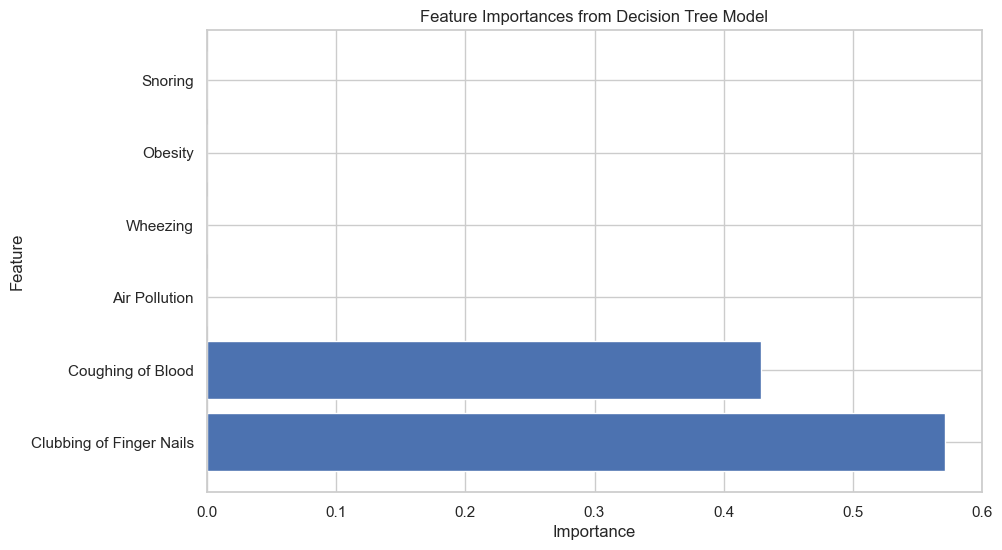

                    Feature  Importance
5  Clubbing of Finger Nails    0.571429
4         Coughing of Blood    0.428571
0             Air Pollution    0.000000
1                  Wheezing    0.000000
2                   Obesity    0.000000
3                   Snoring    0.000000


In [53]:
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.7, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Define models for cross-validation
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Perform cross-validation with 5 folds
models = [('Logistic Regression', log_reg), 
          ('Decision Tree', dec_tree), 
          ('Random Forest', rand_forest), 
          ('Naive Bayes', naive_bayes)]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')

# Build ensemble predictor
ensemble = VotingClassifier(estimators=models, voting='hard')

# Train ensemble predictor on the entire training data
ensemble.fit(X_train, y_train)

# Evaluate ensemble predictor on the validation data
ensemble_accuracy = ensemble.score(X_valid, y_valid)
print(f'Ensemble Predictor Accuracy on Validation Data: {ensemble_accuracy:.4f}')

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

# Define the variables (features) you want to include
selected_features = ['Air Pollution', 'Wheezing', 'Obesity', 'Snoring', 'Coughing of Blood', 'Clubbing of Finger Nails']

# Subset the dataset to include only the selected features and the target variable
subset_data = data[selected_features + ['Level']]

# Split the dataset into training and testing sets
X = subset_data.drop('Level', axis=1)  # Features
y = subset_data['Level']  # Target
# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.8, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test_more, y_valid, y_test_more = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

X_train1, X_train_remaining, y_train1, y_train_remaining = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

X_train2, X_train_remaining, y_train2, y_train_remaining = train_test_split(X_train_remaining, y_train_remaining, test_size=0.333, random_state=42)

X_train3, X_train4, y_train3, y_train4 = train_test_split(X_train_remaining, y_train_remaining, test_size=0.5, random_state=42)

# Train the machine learning model
dt_classifier.fit(X_train1, y_train1)
dt_classifier.fit(X_train2, y_train2)
dt_classifier.fit(X_train3, y_train3)
dt_classifier.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred_more = dt_classifier.predict(X_test_more)

# Evaluate the model
accuracy = accuracy_score(y_test_more, y_pred_more)
print("Accuracy on test data:", accuracy)

dt_classifier_accuracy = dt_classifier.score(X_valid, y_valid)
print(f'{dt_classifier}: Accuracy on validation: {dt_classifier_accuracy:.4f}')


# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

# Fairness
**In this section, the Fairness tools will be looked at**

the category used for the fairness tools will be the severity of cancer. 
this category is called 'level' and is divided in low - medium - high. 
because Aequitas needs a binary variable low will be grouped as 0 and
medium and high will be grouped together as 1. 

In [54]:
#Using the test data generated in the predictive approach, first take a look at the data
print(f' this is X_test:{X_test}')
print(f' this is y_test: {y_test}')
print(f' this is y_pred: {y_pred}')

 this is X_test:     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   

In [55]:
#To be able to form one dataframe the types will be investigated
print(type(y_pred))
print(type(y_test))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [56]:
#Also, to ensure that the rows have equal amounts in the dataframe and thus can align, the number of rows will be shown
num_rows = len(y_pred)
print("Number of rows:", num_rows)

num_rows = len(y_test)
print("Number of rows:", num_rows)

num_rows2 = len(X_test)
print('Number of rows X_test:', num_rows2)

Number of rows: 350
Number of rows: 350
Number of rows X_test: 350


In [57]:
# Here the y_test will be added to the X_test already existing dataframe
# Extra check if the lengths match
if len(X_test) == len(y_test):
    # Add the Series as a new column to the DataFrame
    X_test['y_test'] = y_test.values
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and Series do not match.")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [58]:
# Here the y_pred will be added to the X_test already existing dataframe
# Check if the lengths match
if len(X_test) == len(y_pred):
    # Add the NumPy array as a new column to the DataFrame
    X_test['y_pred'] = y_pred
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and NumPy array do not match.")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [59]:
# Rename the DataFrame
dfbias = X_test.copy()

# Print the DataFrame to verify the changes
print(dfbias)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [60]:
#change the last columns name, the predictions column to 'Prediction'
# Rename the column from '0' to 'Prediction'
dfbias = dfbias.rename(columns={'y_pred': 'Prediction'})

# Print the DataFrame with the renamed column

dfbias

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,y_test,Prediction
60,62,2,3,2,1,3,2,4,5,1,...,3,2,1,2,4,2,3,2,Low,Low
680,27,2,3,1,4,2,3,2,3,3,...,2,3,4,1,5,2,6,2,Low,Low
405,48,2,2,1,5,3,2,3,2,4,...,7,2,5,8,1,3,2,3,Medium,Medium
462,36,1,6,7,7,7,7,7,6,7,...,5,7,6,7,8,7,6,2,High,High
148,28,1,6,7,8,7,6,7,7,2,...,3,6,4,2,3,1,2,1,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,45,2,1,2,4,5,6,5,5,4,...,8,7,3,8,3,2,3,1,Low,Low
193,48,2,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,Medium,Medium
989,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,High,High
131,24,1,6,8,7,7,6,7,7,3,...,2,5,2,3,2,1,7,6,High,High


In [61]:
#Possibly removing of rows with missing data

# Remove rows with missing data (NaN values)
dfbias_clean = dfbias.dropna()

# Print the cleaned DataFrame
print(dfbias_clean)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

Now to decide what we use as sensitive data:

The columns that will be used are:
'Age', 'Gender', 'OccuPational Hazards', 'Weight Loss' and 'Level'

In [62]:
#Change 'y_test' column values of Low = 0 and Medium and High = 1

#Make a copy of the dataframe
dfbias_clean_copy = dfbias_clean.copy()

print(dfbias_clean_copy)

mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'Level' column using the mapping dictionary
dfbias_clean_copy['Prediction'] = dfbias_clean_copy['Prediction'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

C:\Users\TimEW\AppData\Local\Temp\ipykernel_7976\2024784213.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfbias_clean_copy['Prediction'] = dfbias_clean_copy['Prediction'].replace(mapping)


The unique values of age are: [14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 55, 61, 62, 63, 64, 65, 73]


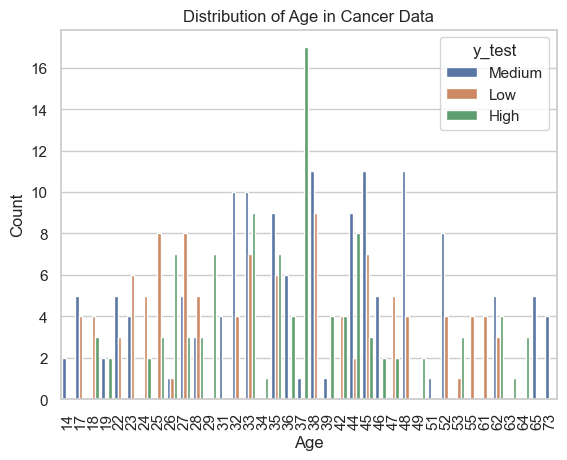

In [63]:
#First Age

# Extract unique values 
Age_values = dfbias_clean_copy['Age'].unique()
#order the values 
Age_values_sorted = sorted(Age_values)
print(f"The unique values of age are: {Age_values_sorted}")

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Age', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Adjust the rotation angle as needed
# Show the plot
plt.show()

The unique values of gender are: [1, 2]


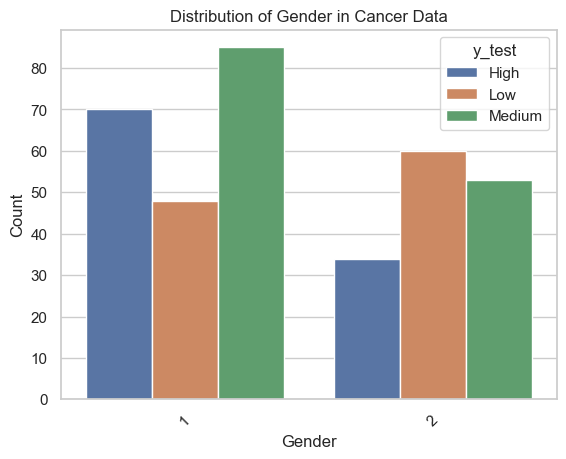

In [64]:
#Second Gender

# Extract unique values 
Gender_values = dfbias_clean_copy['Gender'].unique()
Gender_values_sorted = sorted(Gender_values)
print(f"The unique values of gender are: {Gender_values_sorted}")

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Gender', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

The unique values of Occupational Hazards are: [1, 2, 3, 4, 5, 6, 7, 8]


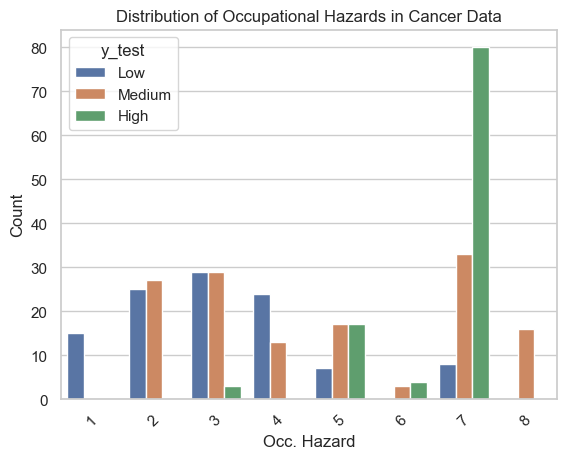

In [65]:
#Third OccuPational Hazards
# Extract unique values 
Occ_values = dfbias_clean_copy['OccuPational Hazards'].unique()
#order the values 
Occ_values_sorted = sorted(Occ_values)
print(f"The unique values of Occupational Hazards are: {Occ_values_sorted}")

# Adding labels and title
plt.xlabel('Occ. Hazard')
plt.ylabel('Count')
plt.title('Distribution of Occupational Hazards in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='OccuPational Hazards', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

The unique values of Weight are: [1, 2, 3, 4, 5, 6, 7, 8]


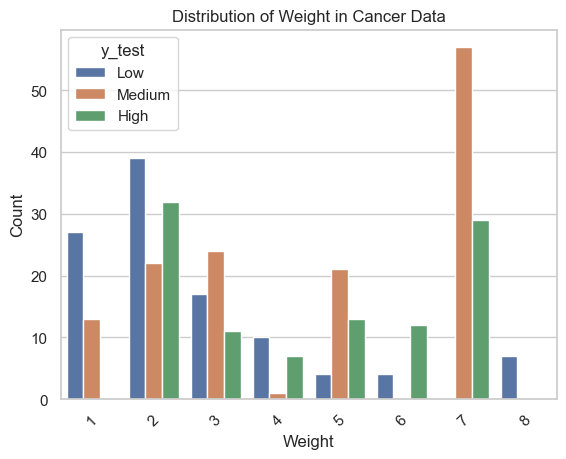

In [66]:
#Fourth Weight Loss

Weight_values = dfbias_clean_copy['Weight Loss'].unique()
#order the values 
Weight_values_sorted = sorted(Weight_values)
print(f"The unique values of Weight are: {Weight_values_sorted}")

# Adding labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Weight Loss', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()


In [67]:
#change the column names from 'Predictive' to 'Score' and change the values of medium and high to 1, low to 0
#change 'y_test' to 'label_value'

# Change the column names
# Rename the columns
dfbias_clean_copy.rename(columns={'y_test': 'label_value', 'Prediction': 'score'}, inplace=True)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [68]:
#Change the values of Low = 0 and Medium and High = 1, for the column score

# Define the mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'score' column using the mapping dictionary
dfbias_clean_copy['score'] = dfbias_clean_copy['score'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [69]:
#Change the values of Low = 0 and Medium and High = 1

# Define mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Map values in the 'label_value' column
dfbias_clean_copy['label_value'] = dfbias_clean_copy['label_value'].map(mapping)

# Print the DataFrame with updated values
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [70]:
# Next test it with the score and the label_value column
# Create a copy of dfbias_clean_copy to work with
dfSTR = dfbias_clean_copy.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in dfSTR.columns:
    if column not in exclude_columns:
        dfSTR[column] = dfSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(dfSTR.dtypes)

Age                         object
Gender                      object
Air Pollution               object
Alcohol use                 object
Dust Allergy                object
OccuPational Hazards        object
Genetic Risk                object
chronic Lung Disease        object
Balanced Diet               object
Obesity                     object
Smoking                     object
Passive Smoker              object
Chest Pain                  object
Coughing of Blood           object
Fatigue                     object
Weight Loss                 object
Shortness of Breath         object
Wheezing                    object
Swallowing Difficulty       object
Clubbing of Finger Nails    object
Frequent Cold               object
Dry Cough                   object
Snoring                     object
label_value                  int64
score                        int64
dtype: object


In [71]:
group = Group()
xtab, _ = group.get_crosstabs(dfSTR)

In [72]:
absolute_metrics = group.list_absolute_metrics(xtab)

In [73]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,242,Age,14,2,0,0,0,0,2,2,0,2,350
1,0,binary 0/1,242,Age,17,5,4,0,0,4,5,5,4,9,350
2,0,binary 0/1,242,Age,18,3,4,0,0,4,3,3,4,7,350
3,0,binary 0/1,242,Age,19,4,0,0,0,0,4,4,0,4,350
4,0,binary 0/1,242,Age,22,5,3,0,0,3,5,5,3,8,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,0,binary 0/1,242,Snoring,3,51,20,0,0,20,51,51,20,71,350
200,0,binary 0/1,242,Snoring,4,33,11,0,0,11,33,33,11,44,350
201,0,binary 0/1,242,Snoring,5,50,0,0,0,0,50,50,0,50,350
202,0,binary 0/1,242,Snoring,6,7,0,0,0,0,7,7,0,7,350


In [74]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Age,14,1.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.01,1.00,1.00
1,Age,17,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.02,0.56,0.56
2,Age,18,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.43,0.43
3,Age,19,1.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.02,1.00,1.00
4,Age,22,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.02,0.62,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Snoring,3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.21,0.72,0.72
200,Snoring,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.14,0.75,0.75
201,Snoring,5,1.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.21,1.00,1.00
202,Snoring,6,1.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.03,1.00,1.00


In [75]:
# Since almost everything is in levels of 8, there will be categories made per attribute. These will be in the form of low, medium, high, where low will be the categories 1,2,3 medium 3, 4, 5 and high 6, 7, 8 

#create a new dataframe a copy of the previous one to make categories, using df bias_clean_copy because here the types are still integers
#show types
print(dfbias_clean_copy.dtypes)

#create a new dataframe
catdf = dfbias_clean_copy.copy()
catdf

Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
label_value                 int64
score                       int64
dtype: object


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,label_value,score
60,62,2,3,2,1,3,2,4,5,1,...,3,2,1,2,4,2,3,2,0,0
680,27,2,3,1,4,2,3,2,3,3,...,2,3,4,1,5,2,6,2,0,0
405,48,2,2,1,5,3,2,3,2,4,...,7,2,5,8,1,3,2,3,1,1
462,36,1,6,7,7,7,7,7,6,7,...,5,7,6,7,8,7,6,2,1,1
148,28,1,6,7,8,7,6,7,7,2,...,3,6,4,2,3,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,45,2,1,2,4,5,6,5,5,4,...,8,7,3,8,3,2,3,1,0,0
193,48,2,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,1,1
989,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,1,1
131,24,1,6,8,7,7,6,7,7,3,...,2,5,2,3,2,1,7,6,1,1


In [76]:
#As mentioned before, not all columns will be used for this analysis, therefore other columns have to be dropped, the columns that will stay are, Age, Gender, OccuPational Hazards and Weight Loss

catdf.drop(columns=['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', ], inplace=True)

print(catdf)

     Age  Gender  OccuPational Hazards  Weight Loss  label_value  score
60    62       2                     3            3            0      0
680   27       2                     2            2            0      0
405   48       2                     3            7            1      1
462   36       1                     7            5            1      1
148   28       1                     7            3            0      0
..   ...     ...                   ...          ...          ...    ...
816   45       2                     5            8            0      0
193   48       2                     7            7            1      1
989   37       1                     7            2            1      1
131   24       1                     7            2            1      1
10    44       1                     7            3            1      1

[350 rows x 6 columns]


In [77]:
# Find the minimum values of all columns
min_values = catdf.min()

# Find the maximum values of all columns
max_values = catdf.max()

# Print the minimum and maximum values of all columns
print("Minimum values:")
print(min_values)
print("Maximum values:")
print(max_values)


Minimum values:
Age                     14
Gender                   1
OccuPational Hazards     1
Weight Loss              1
label_value              0
score                    0
dtype: int64
Maximum values:
Age                     73
Gender                   2
OccuPational Hazards     8
Weight Loss              8
label_value              1
score                    1
dtype: int64


In [78]:
# Define the bins and labels for the Age column, create 3 categories for ages below 33, between 33 and 44 and higher than 44, respectively in 'LowAge', 'MediumAge', 'HighAge'
bins = [-float('inf'), 33, 44, float('inf')]
labels = ['LowAge', 'MediumAge', 'HighAge']

# Use pd.cut() to categorize the ages into bins
catdf['Age_Category'] = pd.cut(catdf['Age'], bins=bins, labels=labels, right=False)

#and remove the Age column
catdf.drop(columns=['Age'], inplace=True)

# Print the DataFrame to verify the changes
print(catdf)

     Gender  OccuPational Hazards  Weight Loss  label_value  score  \
60        2                     3            3            0      0   
680       2                     2            2            0      0   
405       2                     3            7            1      1   
462       1                     7            5            1      1   
148       1                     7            3            0      0   
..      ...                   ...          ...          ...    ...   
816       2                     5            8            0      0   
193       2                     7            7            1      1   
989       1                     7            2            1      1   
131       1                     7            2            1      1   
10        1                     7            3            1      1   

    Age_Category  
60       HighAge  
680       LowAge  
405      HighAge  
462    MediumAge  
148       LowAge  
..           ...  
816      HighAge  
193    

In [79]:
# Define the mapping dictionary
mapping = {1: 'LowOHaz', 2: 'LowOHaz', 3: 'LowOHaz',
           4: 'MedOHaz', 5: 'MedOHaz',
           6: 'HighOHaz', 7: 'HighOHaz', 8: 'HighOHaz'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['OccuPational Hazards'] = catdf['OccuPational Hazards'].replace(mapping)

# Print the DataFrame to verify the changes
print(catdf)

     Gender OccuPational Hazards  Weight Loss  label_value  score Age_Category
60        2              LowOHaz            3            0      0      HighAge
680       2              LowOHaz            2            0      0       LowAge
405       2              LowOHaz            7            1      1      HighAge
462       1             HighOHaz            5            1      1    MediumAge
148       1             HighOHaz            3            0      0       LowAge
..      ...                  ...          ...          ...    ...          ...
816       2              MedOHaz            8            0      0      HighAge
193       2             HighOHaz            7            1      1      HighAge
989       1             HighOHaz            2            1      1    MediumAge
131       1             HighOHaz            2            1      1       LowAge
10        1             HighOHaz            3            1      1      HighAge

[350 rows x 6 columns]


In [80]:
# Define the mapping dictionary
mappingWeight = {1: 'LowWeightLoss', 2: 'LowWeightLoss', 3: 'LowWeightLoss',
           4: 'MedWeightLoss', 5: 'MedWeightLoss',
           6: 'HighWeightLoss', 7: 'HighWeightLoss', 8: 'HighWeightLoss'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['Weight Loss'] = catdf['Weight Loss'].replace(mappingWeight)

# Print the DataFrame to verify the changes
print(catdf)

     Gender OccuPational Hazards     Weight Loss  label_value  score  \
60        2              LowOHaz   LowWeightLoss            0      0   
680       2              LowOHaz   LowWeightLoss            0      0   
405       2              LowOHaz  HighWeightLoss            1      1   
462       1             HighOHaz   MedWeightLoss            1      1   
148       1             HighOHaz   LowWeightLoss            0      0   
..      ...                  ...             ...          ...    ...   
816       2              MedOHaz  HighWeightLoss            0      0   
193       2             HighOHaz  HighWeightLoss            1      1   
989       1             HighOHaz   LowWeightLoss            1      1   
131       1             HighOHaz   LowWeightLoss            1      1   
10        1             HighOHaz   LowWeightLoss            1      1   

    Age_Category  
60       HighAge  
680       LowAge  
405      HighAge  
462    MediumAge  
148       LowAge  
..           ...  
81

In [81]:
#Check the types of the dataframe
print(catdf.dtypes)


Gender                     int64
OccuPational Hazards      object
Weight Loss               object
label_value                int64
score                      int64
Age_Category            category
dtype: object


In [82]:
#Now do the analysis for these categories: 
#Change it to string

# Create a copy of dfbias_clean_copy to work with
catSTR = catdf.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in catSTR.columns:
    if column not in exclude_columns:
        catSTR[column] = catSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(catSTR.dtypes)

Gender                  object
OccuPational Hazards    object
Weight Loss             object
label_value              int64
score                    int64
Age_Category            object
dtype: object


In [83]:
#Change the values of Low = 0 and Medium and High = 1

# Define mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Map values in the 'label_value' column
dfbias_clean_copy['label_value'] = dfbias_clean_copy['label_value'].map(mapping)

# Print the DataFrame with updated values
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
60    62       2              3            2             1   
680   27       2              3            1             4   
405   48       2              2            1             5   
462   36       1              6            7             7   
148   28       1              6            7             8   
..   ...     ...            ...          ...           ...   
816   45       2              1            2             4   
193   48       2              6            8             7   
989   37       1              7            7             7   
131   24       1              6            8             7   
10    44       1              6            7             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
60                      3             2                     4              5   
680                     2             3                     2              3   
405            

In [84]:
group = Group()
xtab, _ = group.get_crosstabs(catSTR)

In [85]:
absolute_metrics = group.list_absolute_metrics(xtab)

In [86]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,242,Gender,1,155,48,0,0,48,155,155,48,203,350
1,0,binary 0/1,242,Gender,2,87,60,0,0,60,87,87,60,147,350
2,0,binary 0/1,242,OccuPational Hazards,HighOHaz,136,8,0,0,8,136,136,8,144,350
3,0,binary 0/1,242,OccuPational Hazards,LowOHaz,59,69,0,0,69,59,59,69,128,350
4,0,binary 0/1,242,OccuPational Hazards,MedOHaz,47,31,0,0,31,47,47,31,78,350
5,0,binary 0/1,242,Weight Loss,HighWeightLoss,98,11,0,0,11,98,98,11,109,350
6,0,binary 0/1,242,Weight Loss,LowWeightLoss,102,83,0,0,83,102,102,83,185,350
7,0,binary 0/1,242,Weight Loss,MedWeightLoss,42,14,0,0,14,42,42,14,56,350
8,0,binary 0/1,242,Age_Category,HighAge,87,34,0,0,34,87,87,34,121,350
9,0,binary 0/1,242,Age_Category,LowAge,71,48,0,0,48,71,71,48,119,350


In [87]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Gender,1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.64,0.76,0.76
1,Gender,2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.36,0.59,0.59
2,OccuPational Hazards,HighOHaz,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.56,0.94,0.94
3,OccuPational Hazards,LowOHaz,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.24,0.46,0.46
4,OccuPational Hazards,MedOHaz,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.19,0.60,0.60
5,Weight Loss,HighWeightLoss,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.40,0.90,0.90
6,Weight Loss,LowWeightLoss,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.42,0.55,0.55
7,Weight Loss,MedWeightLoss,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.17,0.75,0.75
8,Age_Category,HighAge,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.36,0.72,0.72
9,Age_Category,LowAge,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.29,0.60,0.60


In [88]:
#Explanation 
#the true positive rate and the true negative rates are both 1 for all the variables. This means that the prediction is equal to the actual data. This is seems good, but it can raise some questions. Because data is collected, especially this data that has an anonymous or at least not ... source, you do not expect perfect data, perfect data is something that is non-existent. It therefore raises questions about the quality of the data and the way the data was collected. We should keep an eye on the conclusion that will be done from this data since it could be that there is only a certain amount of data, or that the data has been altered.

#Since this is the case it doesn't work to compare different groups between each other since there are no differences. 

In [89]:
bias = Bias()


In [90]:
bias_df = bias.get_disparity_predefined_groups(xtab, original_df=catSTR, 
                                        ref_groups_dict={'Gender':'1', 'OccuPational Hazards':'LowOHaz', 'Weight Loss':'MedWeightLoss', 'Age_Category':'MediumAge'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bias_df.style

C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\scipy\stats\_morestats.py:3025: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\scipy\stats\_morestats.py:3025: RuntimeWarning: invalid value encountered in double_scalars
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\scipy\stats\_morestats.py:3025: RuntimeWarning: divide by zero encountered in log
  numer = (Ntot*1.0 - k) * log(spsq) - np.sum((Ni - 1.0)*log(ssq), axis=0)
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\scipy\stats\_morestats.py:3025: RuntimeWarning: invalid value e

,model_id,score_threshold,k,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,242,Gender,1,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,155,48,0.640496,0.763547,0,0,48,155,155,48,203,350,0.763547,False,False,nan,1,None,nan,1,None,nan,1,None,nan,1,None,1.000000,1,None,1.000000,1,False,1.000000,1,False,1.000000,1,None,1.000000,1,None,1.000000,1,None
1,0,binary 0/1,242,Gender,2,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,87,60,0.359504,0.591837,0,0,60,87,87,60,147,350,0.591837,True,True,nan,1,None,nan,1,None,nan,1,None,nan,1,None,1.000000,1,None,0.561290,1,True,0.775115,1,True,1.000000,1,None,1.000000,1,None,1.000000,1,None
2,0,binary 0/1,242,OccuPational Hazards,HighOHaz,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,136,8,0.561983,0.944444,0,0,8,136,136,8,144,350,0.944444,True,True,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,2.305085,LowOHaz,True,2.048964,LowOHaz,True,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
3,0,binary 0/1,242,OccuPational Hazards,LowOHaz,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,59,69,0.243802,0.460938,0,0,69,59,59,69,128,350,0.460938,False,False,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,False,1.000000,LowOHaz,False,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
4,0,binary 0/1,242,OccuPational Hazards,MedOHaz,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,47,31,0.194215,0.602564,0,0,31,47,47,31,78,350,0.602564,True,True,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,0.796610,LowOHaz,True,1.307258,LowOHaz,True,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
5,0,binary 0/1,242,Weight Loss,HighWeightLoss,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,98,11,0.404959,0.899083,0,0,11,98,98,11,109,350,0.899083,True,True,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,2.333333,MedWeightLoss,True,1.198777,MedWeightLoss,True,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
6,0,binary 0/1,242,Weight Loss,LowWeightLoss,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,102,83,0.421488,0.551351,0,0,83,102,102,83,185,350,0.551351,True,True,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,2.428571,MedWeightLoss,True,0.735135,MedWeightLoss,True,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
7,0,binary 0/1,242,Weight Loss,MedWeightLoss,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,42,14,0.173554,0.750000,0,0,14,42,42,14,56,350,0.750000,False,False,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,False,1.000000,MedWeightLoss,False,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
8,0,binary 0/1,242,Age_Categ

The warning message above is not surprising since there are division by 0 while many values take the value of 0 

In [91]:
# View disparity metrics added to dataframe
bias_df[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bias_df) + bias.list_significance(bias_df)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,Gender,1,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
1,Gender,2,nan,nan,nan,nan,1.000000,0.561290,0.775115,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
2,OccuPational Hazards,HighOHaz,nan,nan,nan,nan,1.000000,2.305085,2.048964,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
3,OccuPational Hazards,LowOHaz,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
4,OccuPational Hazards,MedOHaz,nan,nan,nan,nan,1.000000,0.796610,1.307258,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
5,Weight Loss,HighWeightLoss,nan,nan,nan,nan,1.000000,2.333333,1.198777,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
6,Weight Loss,LowWeightLoss,nan,nan,nan,nan,1.000000,2.428571,0.735135,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
7,Weight Loss,MedWeightLoss,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
8,Age_Category,HighAge,nan,nan,nan,nan,1.000000,1.035714,0.941558,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
9,Age_Category,LowAge,nan,nan,nan,nan,1.000000,0.845238,0.781313,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None


In [92]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [93]:
ap.summary(bias_df, metrics, fairness_threshold = disparity_tolerance)

C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\aequitas\plot\summary_chart.py:373: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg(
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\aequitas\plot\summary_chart.py:373: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  .agg(
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\aequitas\plot\summary_chart.py:373: FutureWarning: The provided callable <built-in function sum> is currentl

alt.VConcatChart(...)

In [94]:
ap.disparity(bias_df, metrics, 'Gender', fairness_threshold = disparity_tolerance)

C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
C:\Users\TimEW\Documents\CoSEM\Python_projects\Responsible_Data_Analytics_python311_interpreter\Lib\site-packages\altair\vegalite\v5\api.py:405: AltairDeprecationWarning: The value of 'empty' should be True or False.
  warnings.warn(


ValueError: cannot convert float NaN to integer

In [ ]:
ap.disparity(bias_df, metrics, 'OccuPational Hazards', fairness_threshold = disparity_tolerance)

In [ ]:
ap.disparity(bias_df, metrics, 'Weight Loss', fairness_threshold = disparity_tolerance)

In [ ]:
ap.disparity(bias_df, metrics, 'Age_Category', fairness_threshold = disparity_tolerance)

Because of the NaN value the part above cannot be performed. 

### Historical Biases

**Historical biases**

It is seen that the older people get the more likely they will have cancer. (https://www.webmd.com/cancer/cancer-incidence-age)
Lastly, men are more likely to get cancer in general than women. (https://www.wcrf.org/cancer-trends/worldwide-cancer-data/)

In [ ]:
#Amount of new cancer cases for men in 2020 with cancer according to WCRF.org
WCRF_men = 9342957
#Amount of new cancer cases for men in 2020 with cancer according to WCRF.org
WCRF_women = 8751759
#Translate it into percentages because then it is easier to compare to the data in our dataset
WCRF_menP = WCRF_men / (WCRF_men + WCRF_women) * 100 
WCRF_womenP = WCRF_women / (WCRF_men + WCRF_women) * 100

Bdf = cancer_df.copy()
Bdf['Level'] = Bdf['Level'].replace({'Low': 1, 'Medium': 2, 'High': 3})

#Translate our data to percentages as well
Total_count_G = Bdf['Gender'].value_counts()
print(Total_count_G)


# Get the count of 1 and 2
Count_G_1 = Total_count_G.get(1, 0)  # If 1 doesn't exist, default to 0
Count_G_2 = Total_count_G.get(2, 0)  # If 2 doesn't exist, default to 0

#As discussed before, 1 is for males and 2 is for females
print("Count of Males in 'Gender':", Count_G_1)
print("Count of Females in 'Gender':", Count_G_2)

Count_G_1P = Count_G_1 / (Count_G_1 + Count_G_2) * 100 
Count_G_2P = Count_G_2 / (Count_G_1 + Count_G_2) * 100

In [ ]:
#plot the percentages in a metric, with  our data as barplots and the reallife data as dots in the bar plot

# Create bar plot
labels = ['males', 'females']
values = [Count_G_1P, Count_G_2P]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)

# Add big red dots
plt.scatter(labels[0], WCRF_menP, color='red', s=200, label='real life distribution new cancer cases 2020 (Males)')
plt.scatter(labels[1], WCRF_womenP, color='purple', s=200, label='real life distribution new cancer cases in 2020 (Females)')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Bar plot of Count_G_1P and Count_G_2P')

# Add more space to the top of the plot
plt.ylim(0, 80)  # Adjust the upper limit of the y-axis

# Show plot
plt.show()

#This shows that there are more cancer counts in the data, which might be a bias. BEcause men are seen to have cancer more often. 

In [ ]:
#Under 20: 1%, 20-34: 3%, 35-44: 5%, 45-54: 14%, 55-64: 24%, 65-74: 25%, 75-84: 20%, 85 and over: 8% from https://www.webmd.com/cancer/cancer-incidence-age, the cancer cases by age groups in the US

#To change them into useable variables
# Define age distribution percentages
age_distribution = {
    'Under 20': 1,
    '20-34': 3,
    '35-44': 5,
    '45-54': 14,
    '55-64': 24,
    '65-74': 25,
    '75-84': 20,
    '85 and over': 8
}

# Test: Output the age distribution percentages
for age_range, percentage in age_distribution.items():
    print(f"{age_range}: {percentage}%")

In [ ]:
# Define age groups and their corresponding ranges
age_groups = {
    'Under 20 D': (0, 20),
    '20-34 D': (20, 35),
    '35-44 D': (35, 45),
    '45-54 D': (45, 55),
    '55-64 D': (55, 65),
    '65-74 D': (65, 75),
    '75-84 D': (75, 85),
    '85 and over D': (85, float('inf'))  # Use 'inf' for infinity
}

# Bin the 'Age' column into the defined age groups
Bdf['Age Group'] = pd.cut(Bdf['Age'], bins=[age_range[0] for age_range in age_groups.values()] + [float('inf')],
                          labels=age_groups.keys(), right=False)

# Count the occurrences of each age group
age_group_counts = Bdf['Age Group'].value_counts()

# Calculate the percentage of each age group relative to the total number of rows
total_rows = len(Bdf)
age_group_percentages = (age_group_counts / total_rows) * 100

# Display the percentage of each age group
print("Percentage of each age group relative to the whole dataframe:")
print(age_group_percentages)

In [ ]:
# Additional data, to add the comparison with the real life data
age_distribution = {
    'Under 20': 1,
    '20-34': 3,
    '35-44': 5,
    '45-54': 14,
    '55-64': 24,
    '65-74': 25,
    '75-84': 20,
    '85 and over': 8
}

# Sample data (replace this with your actual data)
age_group_percentages = pd.Series({
    '19 and under D': 10,
    '20-34 D': 15,
    '35-44 D': 20,
    '45-54 D': 25,
    '55-64 D': 18,
    '65-74 D': 8,
    '75-84 D': 3,
    '85 and over D': 1
})

# Sort the age_group_percentages Series by index (which are the age group labels)
age_group_percentages_sorted = age_group_percentages.sort_index()

# Plot the percentages
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Plot the bar chart
age_group_percentages_sorted.plot(kind='bar', color='skyblue', label='Percentage from data')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Each Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, v in enumerate(age_group_percentages_sorted):
    plt.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

# Add legend with one dot for the red dot
plt.legend(handles=[plt.scatter([], [], color='red', s=100)], labels=['The real value of cancer cases in the UK'])

# Add big red dots for the additional data
for i, (age_range, percentage) in enumerate(age_distribution.items()):
    plt.scatter(i, percentage, color='red', s=100, zorder=5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


This is a very interesting graph as it show a clear opposite of what is expected.

# Model Explainability
The model explainablity serves as a good way to investigate which features in the data are truly impactful. There are two ways of doing so. For simpler models, instrinsic explainations suffice. For a more sophisticated approach there are post-hoc explainability tools that serve this function. 

### Intrinsic Explainability
Here we look at the instrinsic properties of a tree model to study and discover the more important attributes. 

In [ ]:
# The original dataframe is copied, because for this part we recode and drop some attributes
cancer_df_explain = cancer_df.copy()
# The patient ID is dropped and the level attributes are recoded, because these explanation models function on binary decision-making.
cancer_df_explain.drop(['Patient Id'], axis=1, inplace=True)
cancer_df_explain['Level'].replace(1, 0,inplace=True)
cancer_df_explain['Level'].replace(2, 0,inplace=True)
cancer_df_explain['Level'].replace(3, 1,inplace=True)
cancer_df_explain

In [ ]:
# The feature names are taken from the dataframe.
feature_names = cancer_df_explain.columns[:-1]
feature_names

In [ ]:
# Mark labels and encode them using sklearn. This is mainly done to ensure that the labels are sensical.
labels = cancer_df_explain.iloc[:, -1]
le = sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels_intrinsic = le.transform(labels)
class_names = le.classes_
data_intrinsic = cancer_df_explain.iloc[:, :-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)
# Check if there are categorical varibles that we need to make dummies for
print(data_intrinsic.dtypes)

In [ ]:
# Train a model by gradient boosting for the sake of explainability.
train_intrinsic, test_intrinsic, labels_train_intrinsic, labels_test_intrinsic= sklearn.model_selection.train_test_split(data_intrinsic, labels_intrinsic, train_size=0.80, random_state=10)
print("Train shape: ", train_intrinsic.shape)
print("Test shape: ", test_intrinsic.shape)

In [ ]:
# Fit the gradient boosted model.
gbtree_intrinsic = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree_intrinsic.fit(train_intrinsic, labels_train_intrinsic)

In [ ]:
# Testing for predictive accuracy. 
pred_labels_test_intrinsic = gbtree_intrinsic.predict(test_intrinsic)
# Calcualte accuracy on the test set
print("Test set accuracy: ", sklearn.metrics.accuracy_score(labels_test_intrinsic, pred_labels_test_intrinsic))

### Prepare for the feature importance plot of the instrinsic explainability

In [ ]:
# Get feature names for the transformed dataset so that they'll show up on the plot 
gbtree_features_orig = gbtree_intrinsic.get_booster().feature_names
gbtree_features = []
gbtree_features.extend([feature_names[i] for i in range(len(feature_names))])
gbtree_intrinsic.get_booster().feature_names = gbtree_features

In [ ]:
# The weight importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="weight", max_num_features=5)
plt.title("Feature Importance using weight as measurement criteria")
plt.show()

In [ ]:
# The cover importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="cover", max_num_features=5)
plt.title("Feature Importance using cover as measurement criteria")
plt.show()

In [ ]:
# The gain importance plot
xgboost.plot_importance(gbtree_intrinsic, importance_type="gain", max_num_features=5)
plt.title("Feature Importance using gain as measurement criteria")
plt.show()

### Post-hoc explainability (using SHAP)
SHAP is a sophisticated tool that uses a post-hoc explanation approach to discover the importance of features.

In [ ]:
# Looking at the shape of df that are going to be used.
print(train_intrinsic.shape)
print(test_intrinsic.shape)
print(labels_train_intrinsic.shape)
print(labels_test_intrinsic.shape)

In [ ]:
# Fit the (shap) model with the variables from the intrinsic model part. It's only useful if the intrinsic model part is used here, since this one needs to be actually explained.
gbtree_shap = xgboost.XGBClassifier(n_estimators=200, max_depth=5)
gbtree_shap.fit(train_intrinsic, labels_train_intrinsic)

In [ ]:
# Make predictions and measure the accuracy again (this should be the same as the intrinsic part)
pred_labels_test = gbtree_shap.predict(test_intrinsic)
print("Test set accuracy: ", sklearn.metrics.accuracy_score(labels_test_intrinsic, pred_labels_test))

In [ ]:
# Creating the post-hoc explainer with shap
explainer = shap.TreeExplainer(gbtree_shap)
shap_values = explainer.shap_values(test_intrinsic)

In [ ]:
# Plotting the explanation and most relevant values and features.
shap.summary_plot(shap_values, test_intrinsic, feature_names=feature_names, plot_type='bar')

In [ ]:
# Looking at the shapes of the data objects to fit them into the waterfall
print(shap_values.shape)
print(test_intrinsic.shape)

In [ ]:
#i is the index of the data point of interest,(investigated i = 8 and i = 27)
i = 8
_waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], test_intrinsic.iloc[i])

In [ ]:
# Studying specific points of interest (investigated i = 67 and i = 34)
shap.initjs()
i=34
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.iloc[i,:], matplotlib=True)

In [ ]:
# The whole summary plot
shap.summary_plot(shap_values, test_intrinsic)

In [ ]:
# Summary plots with Possibility to filter and/or create cohort plots
# First 50
shap.summary_plot(shap_values[:50, :], test_intrinsic.iloc[:50, :])